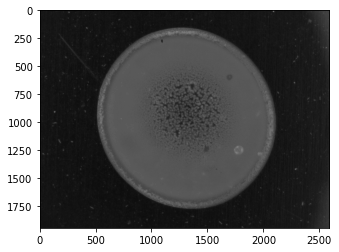

(2592, 1944)
(1944, 2592)


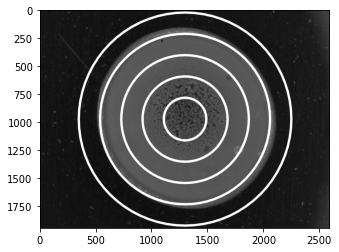

In [70]:
from pathlib import Path
# import sys
# import importlib
# importlib.reload(sys.modules['src.models'])
# project_dir = Path(__file__).resolve().parents[2]
# Extract pixels from the whole image
import numpy as np
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt
import cv2

image_path = '../data/raw/220413/tiff/reflection'


img_origin = Image.open(image_path + '/dark_blue/220413A_X0p7_RWhite.tiff')
# display(img_origin)
plt.imshow(img_origin, cmap='gray', vmin=0, vmax=255)
plt.show()
print(img_origin.size)
print(np.array(img_origin).shape)
x, y, r = round(img_origin.size[0] / 2), round(img_origin.size[1] / 2), 190
img_origin = np.array(img_origin)
color = (255, 0, 0)
for i in range(5):
    cv2.circle(img_origin, (x,y), r * (i+1), color, 2*10)
# plt.title(title)
plt.imshow(img_origin, cmap='gray', vmin=0, vmax=255)
plt.show()

In [71]:
def extract_infor_circle(img_origin, x, y, r):
    img_arr = img_origin
#     print('img_arr is ', img_arr)
    h,w = img_arr.size[1], img_arr.size[0]
    lum_img = Image.new('L',[h,w] ,0)
    draw = ImageDraw.Draw(lum_img)

    leftUpPoint = (x-r, y-r)
    rightDownPoint = (x+r, y+r)
    twoPointList = [leftUpPoint, rightDownPoint]
    draw.ellipse(twoPointList, fill=255)
    lum_img_arr = np.array(lum_img)
#     print('shapes are', img_arr.size, lum_img_arr.shape, np.array(img_arr).shape, lum_img_arr)
    final_img_arr = np.dstack((np.array(img_arr).T, lum_img_arr))
#     print('final_img_arr shapes are', final_img_arr.size)
#     plt.imshow(Image.fromarray(final_img_arr))
#     plt.show()
    return final_img_arr

In [72]:
def draw_circles(img,circles, title):
    color = (255, 0, 0)
    # Line thickness of -1 px
    thickness = 10
#     if circles is not None:
#         circles = np.uint16(np.around(circles))
#         num = 0
#         for i in circles[0, :]:
#             # print('i is ', i)
#             num = num + 1
    img = np.array(img)
    cv2.circle(img, (circles[0], circles[1]), circles[2], color, 2*10)
#     plt.title(title)
#     plt.imshow(img)
#     plt.show()
    return img

In [73]:
def extract_circle_v2(image, height, width, first_ring, second_ring, only_one=True):
    centerX, centerY, radius = first_ring
    centerX2, centerY2, radius2 = second_ring
    canvas = np.zeros((height, width))
    # Draw the outer circle:
#     print('redius is ', radius, radius2)
    color = (255, 255, 255)
    thickness = -1
#     centerX = i[0]
#     centerY = i[1]
#     radius = i[2]
    if only_one:
        radius = radius2
        cv2.circle(canvas, (centerX, centerY), radius, color, thickness)
    else:
        cv2.circle(canvas, (centerX2, centerY2), radius2, color, thickness)
        color = (0, 0, 0)
        cv2.circle(canvas, (centerX, centerY), radius, color, thickness)

    # Create a copy of the input and mask input:
    imageCopy = image.copy()
    imageCopy[canvas == 0] = (0, 0, 0)

    # Crop the roi:
    x = centerX - radius
    y = centerY - radius
    h = 2 * radius
    w = 2 * radius
    if not only_one:
        x = centerX2 - radius2
        y = centerY2 - radius2
        h = 2 * radius2
        w = 2 * radius2
    croppedImg = imageCopy[y:y + h, x:x + w]
    return croppedImg


In [74]:
def main_lbp(data_dir):
#     i = 0
    for image_file in data_dir.iterdir():
#         if i > 1: 
#             break;
#         print(os.path.basename(image_file))
#         print(image_file)
        image = cv2.imread(str(image_file))
#         print(image.shape)
        x, y, r = round(image.shape[0] / 2), round(image.shape[1] / 2), 190
        height = image.shape[0]
        width = image.shape[1]
        fig = plt.figure(figsize=(50,10))
        ax  = fig.add_subplot(1,6,1)
        ax.set_title(os.path.basename(image_file))
        ax.imshow(image)
        for j in range(5):
            merged_image = extract_circle_v2(image, height, width, (y, x, j*r), (y, x, (j+1)*r), False if j > 0 else True)
            imgLBP    = getLBPimage(merged_image, False)
            vecimgLBP = imgLBP.flatten()
#             ax.set_title("gray scale image")
#             ax  = fig.add_subplot(1,3,2)
#             ax.imshow(Image.fromarray(imgLBP))
#             ax.set_title("LBP converted image")
            ax  = fig.add_subplot(1,6,j+2)
            freq,lbp, _ = ax.hist(vecimgLBP,bins=2**8)
            ax.set_ylim(0,100000)
            lbp = lbp[:-1]
            ax.set_title("LBP histogram" + str((j+1)*r))
        plt.show()
#         i += 1

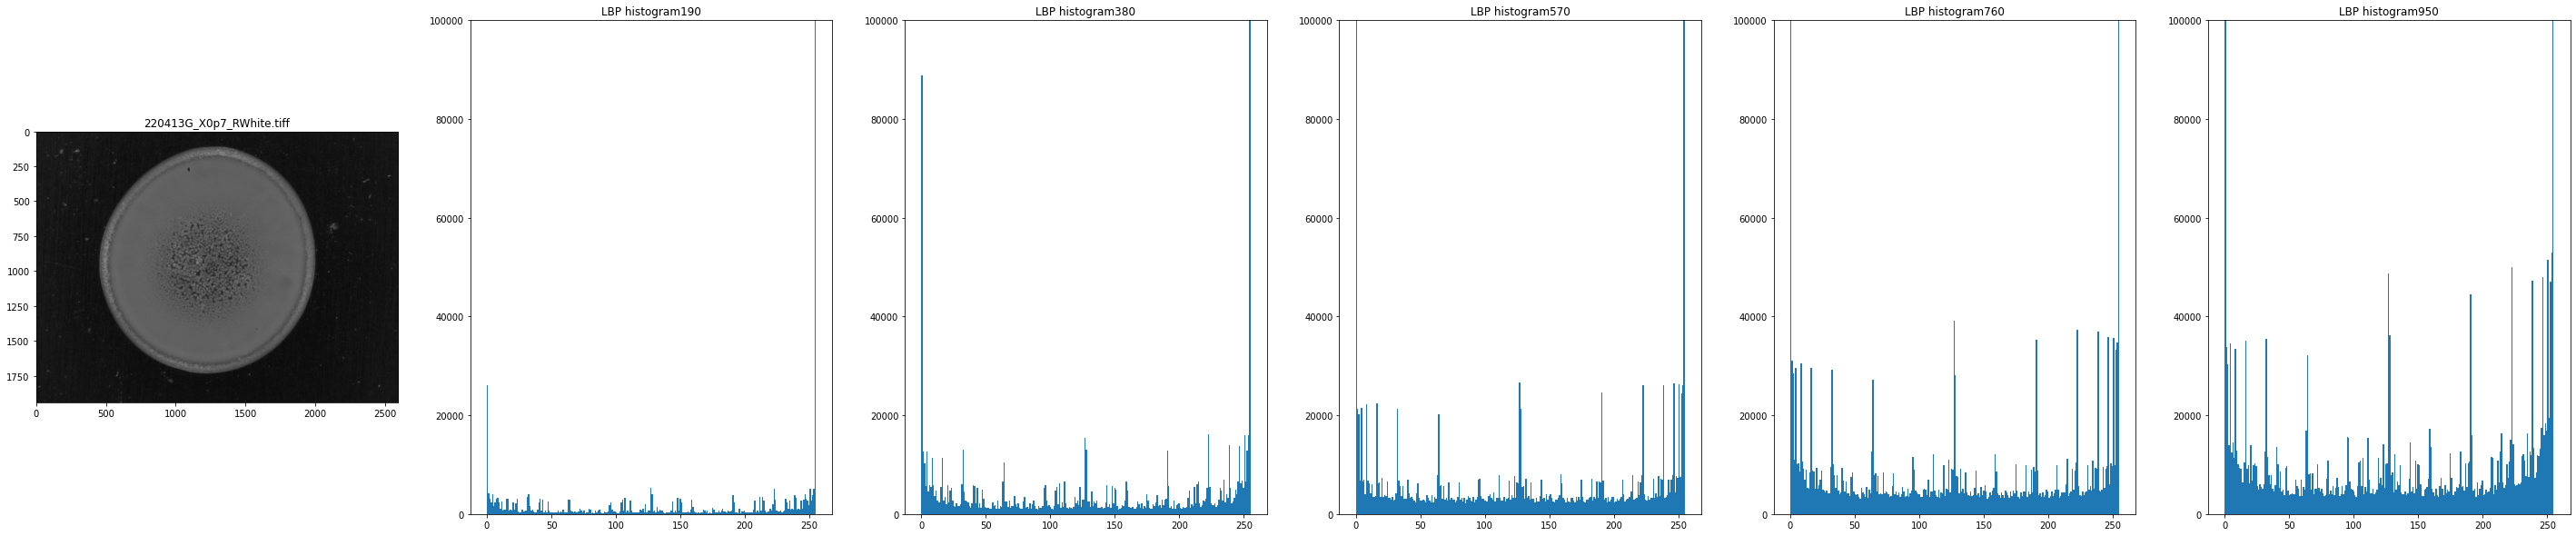

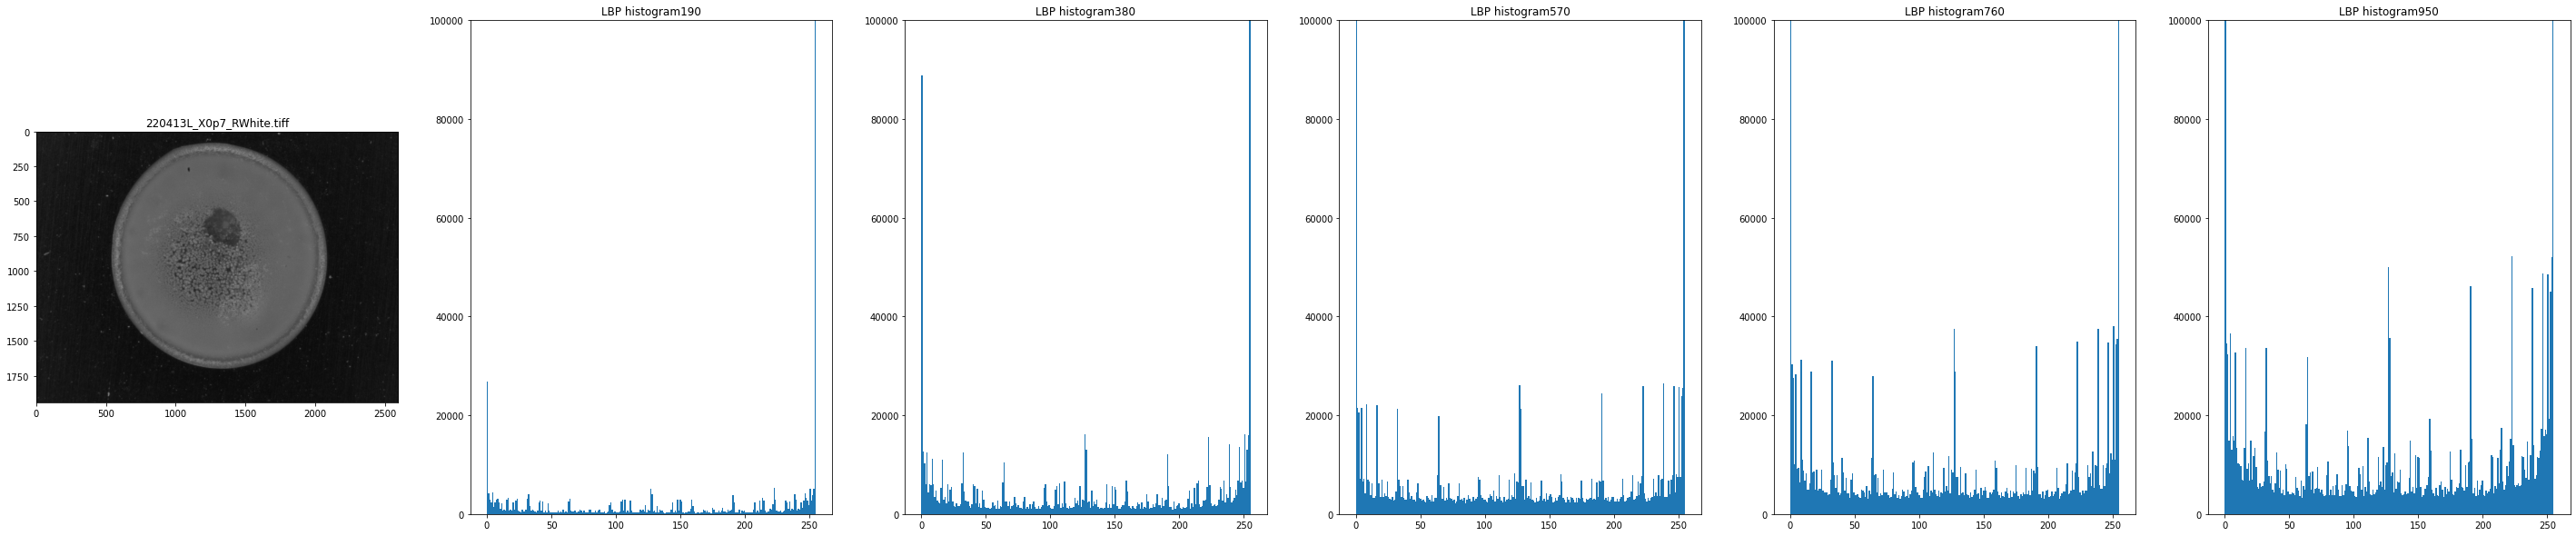

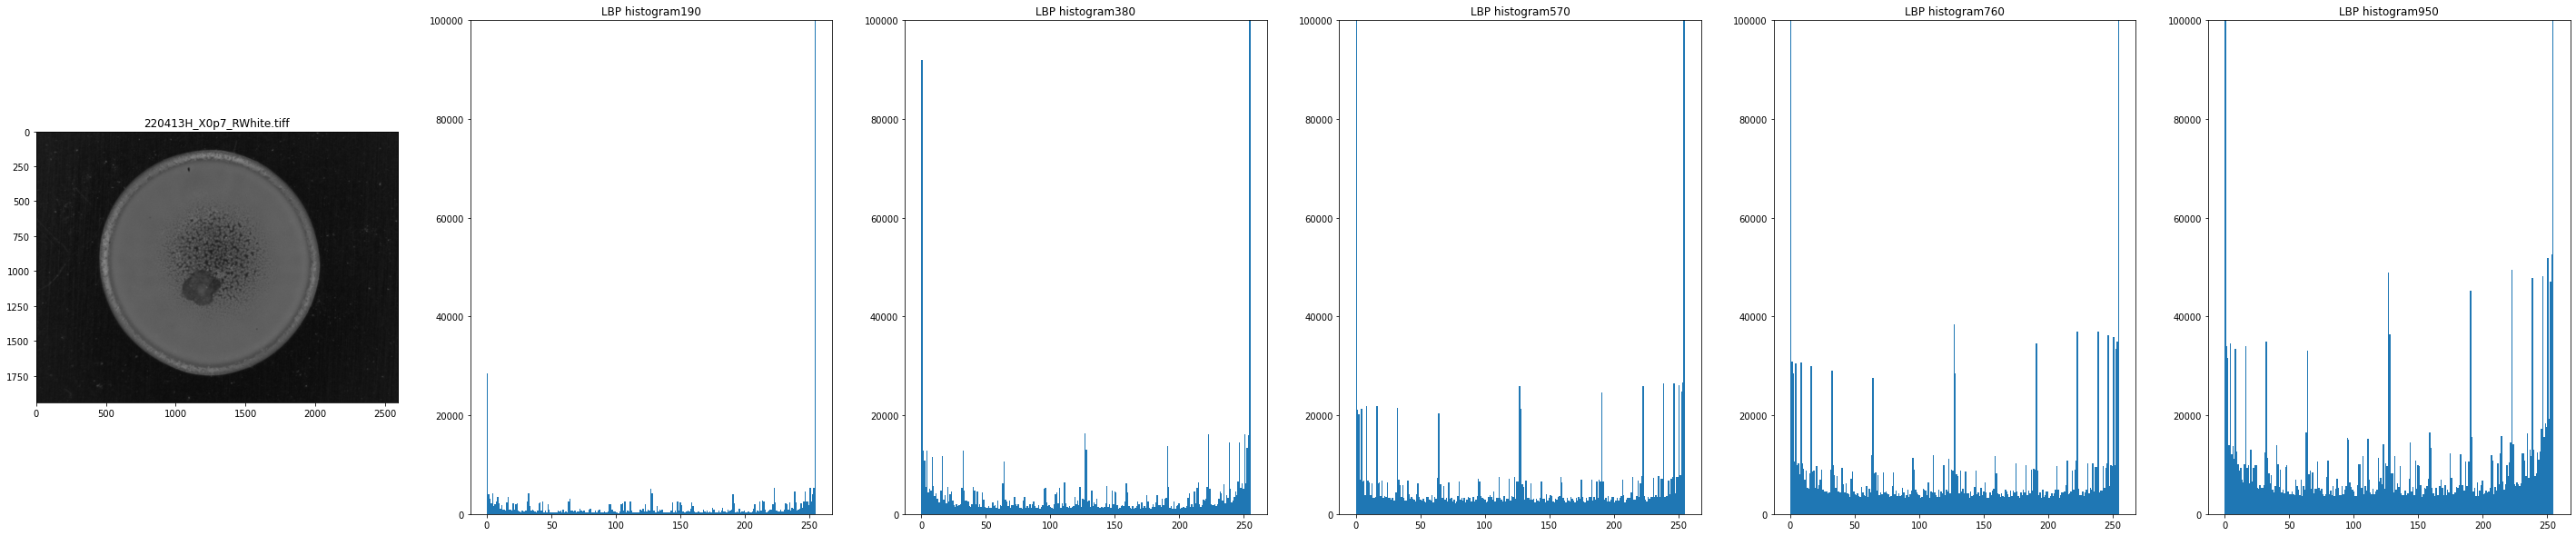

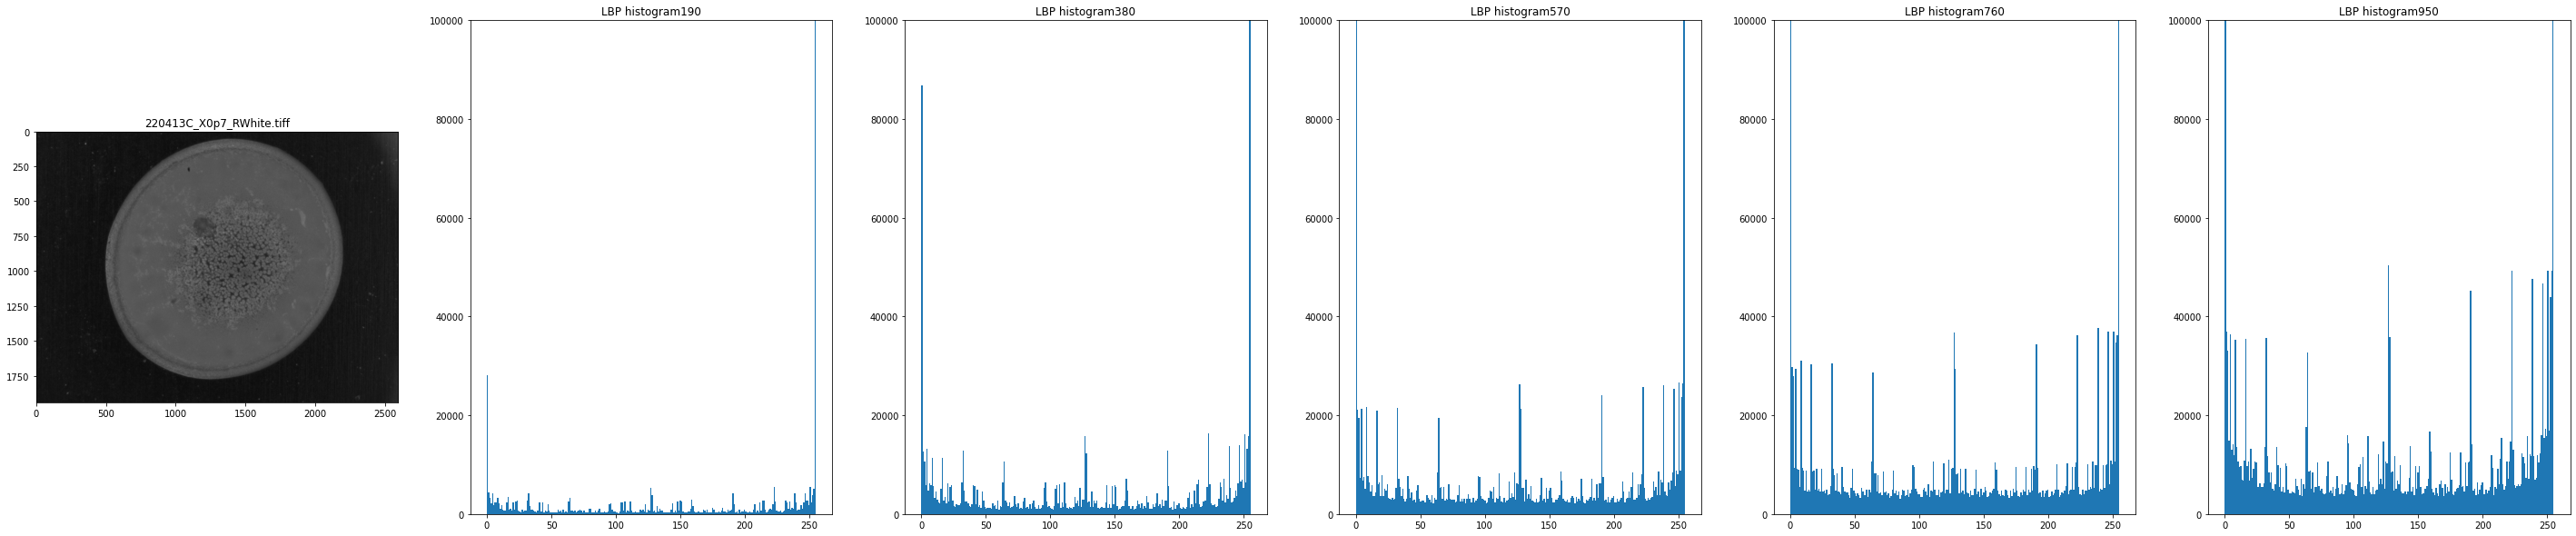

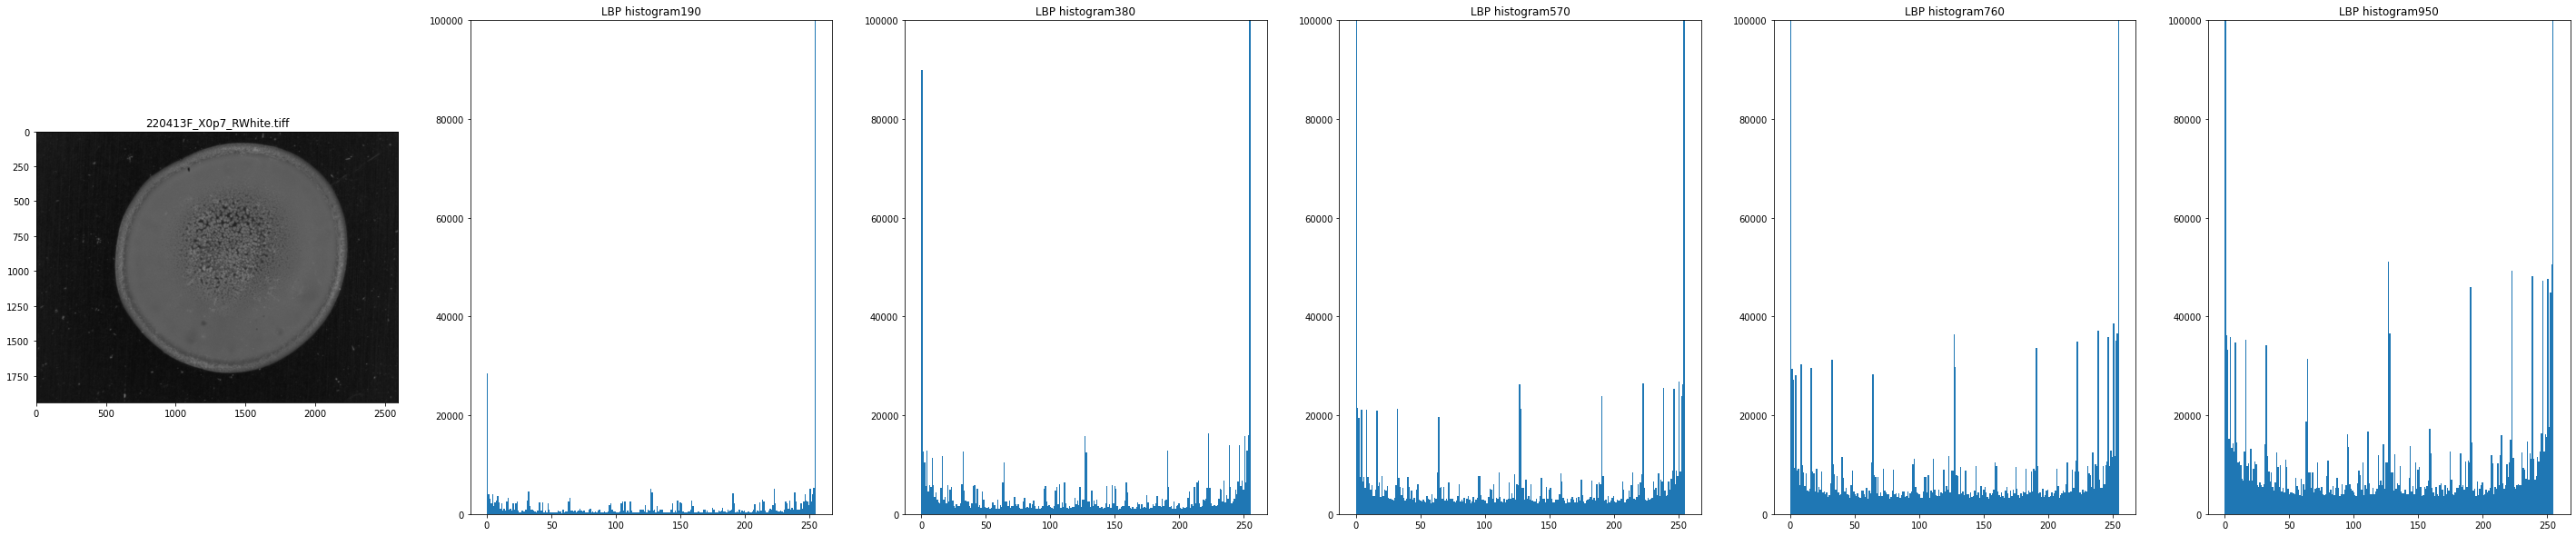

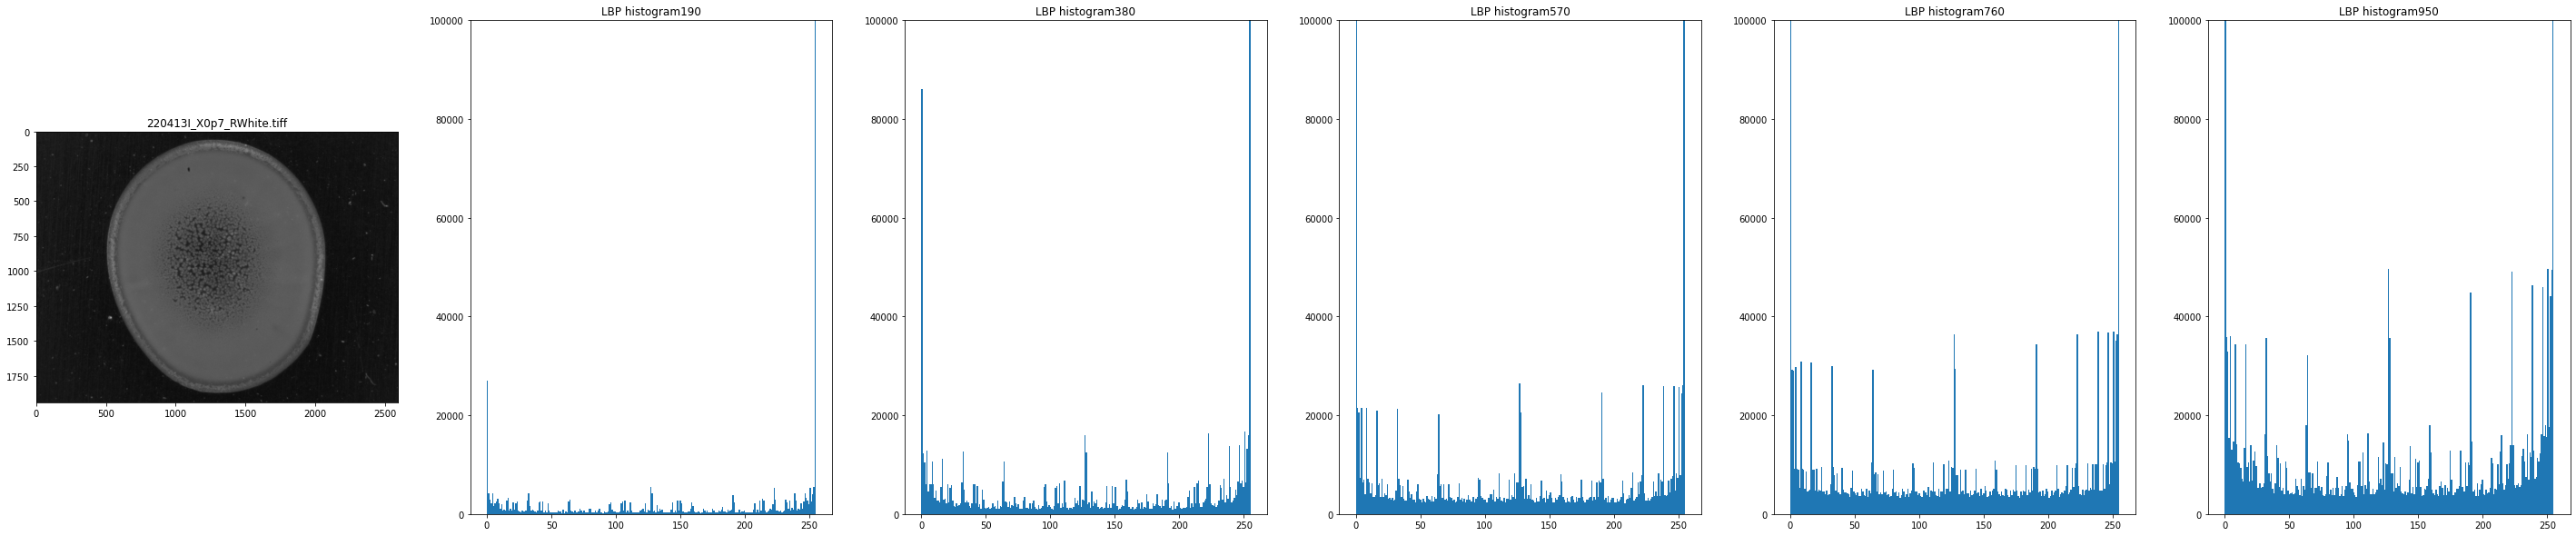

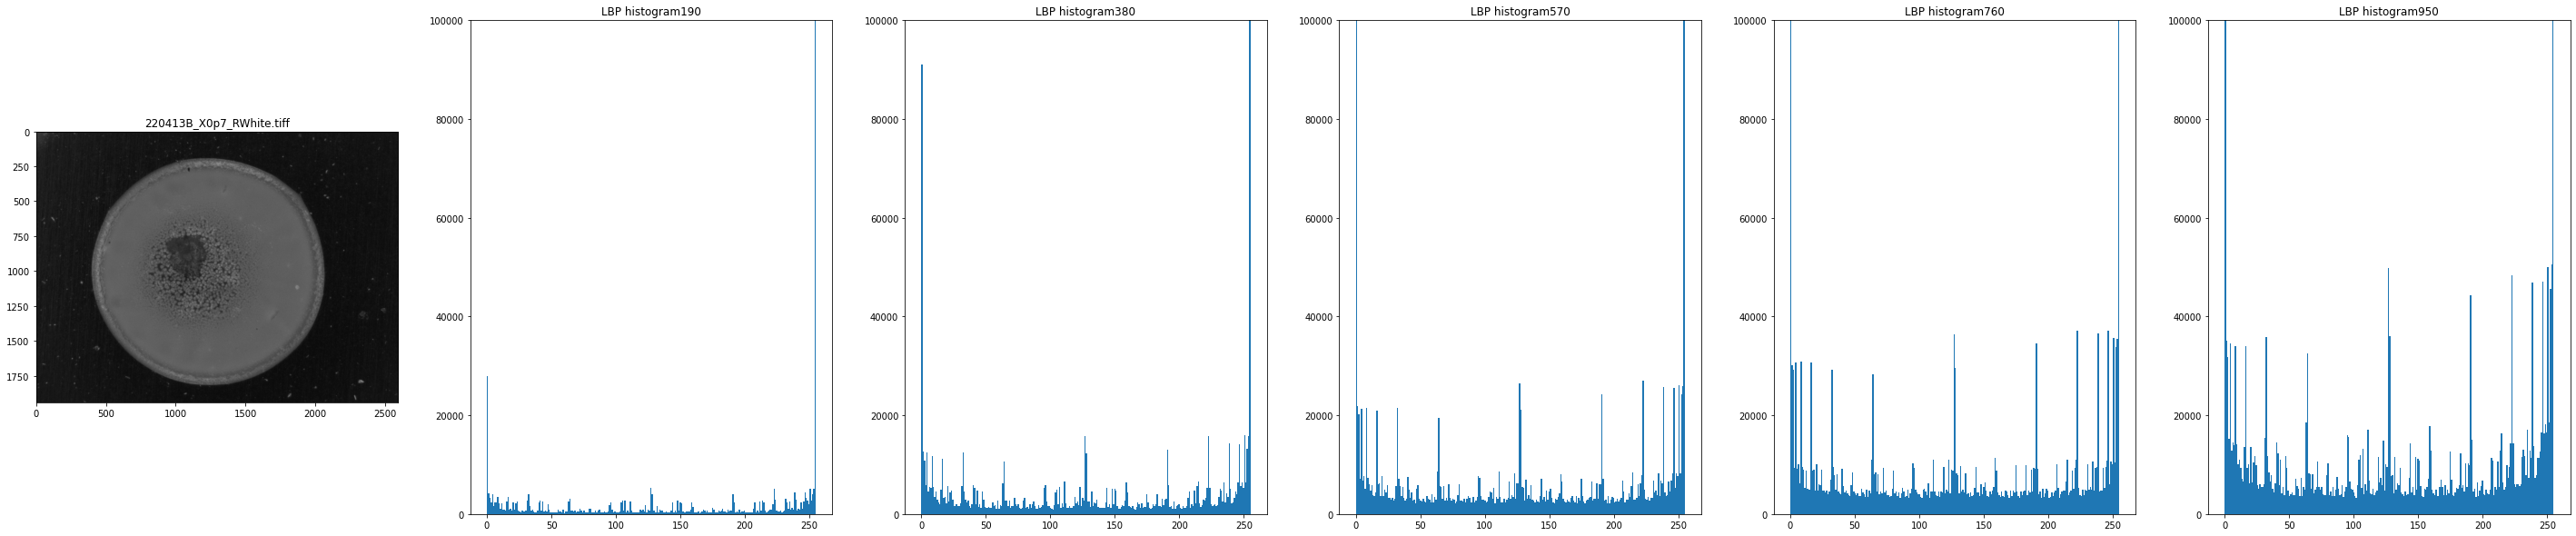

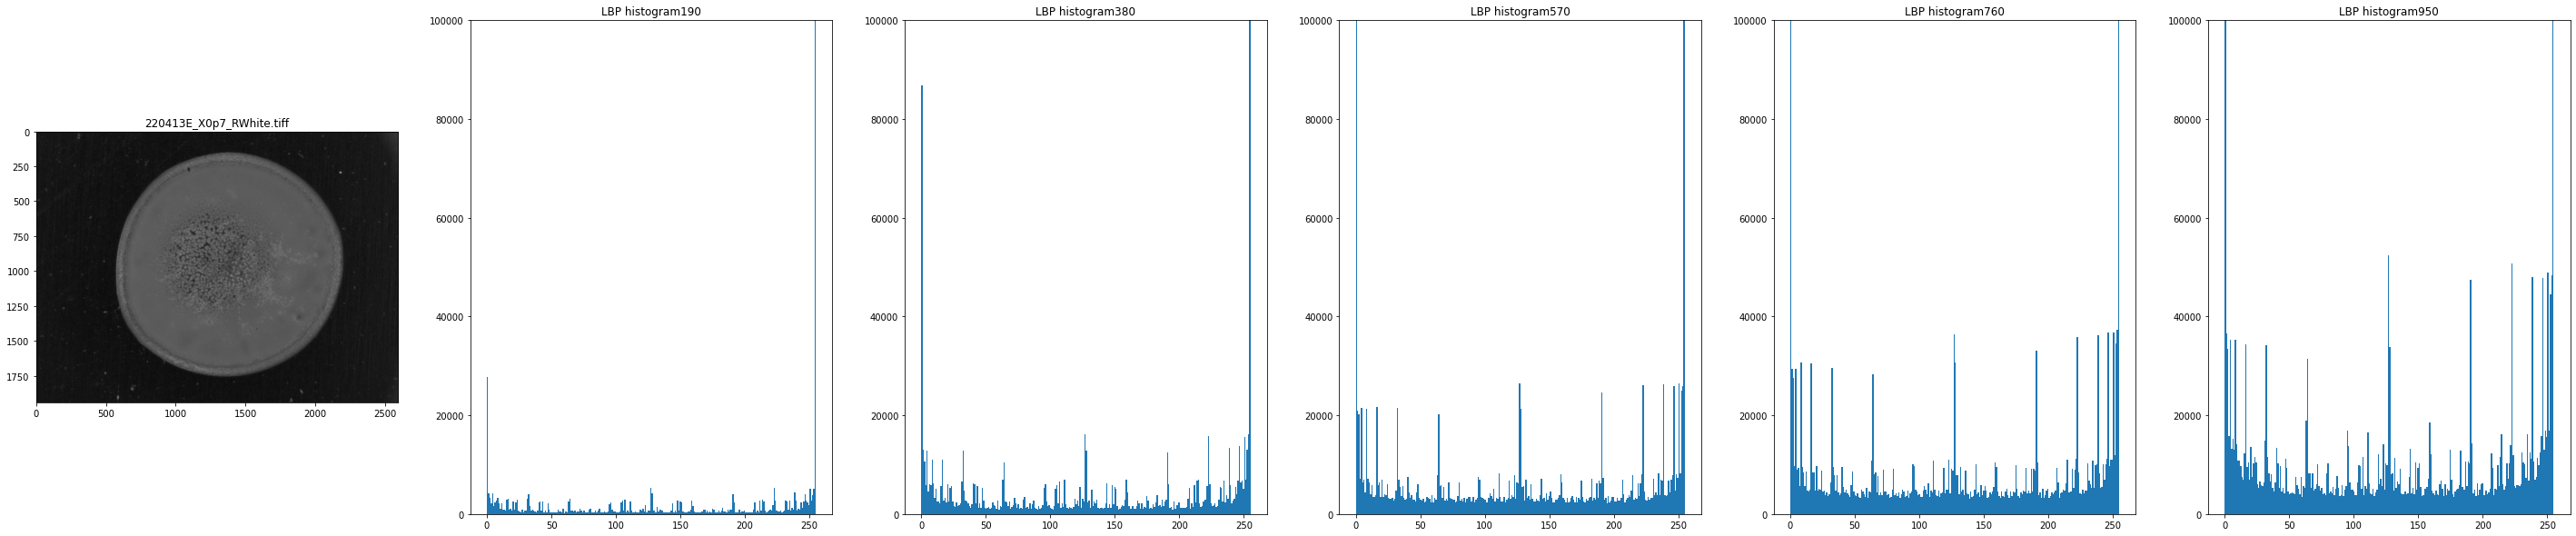

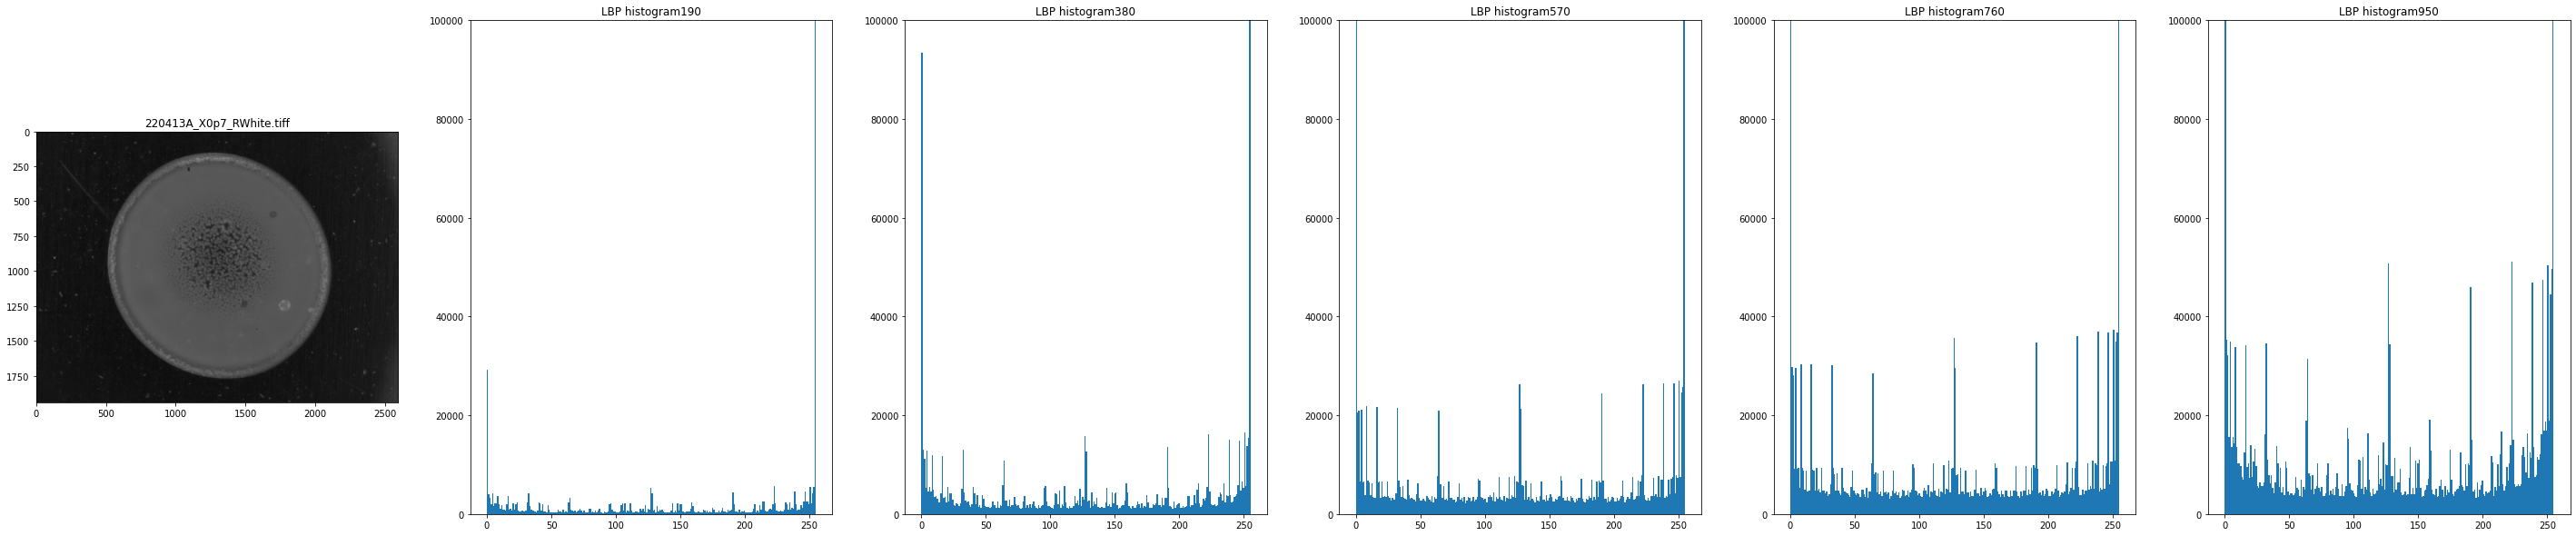

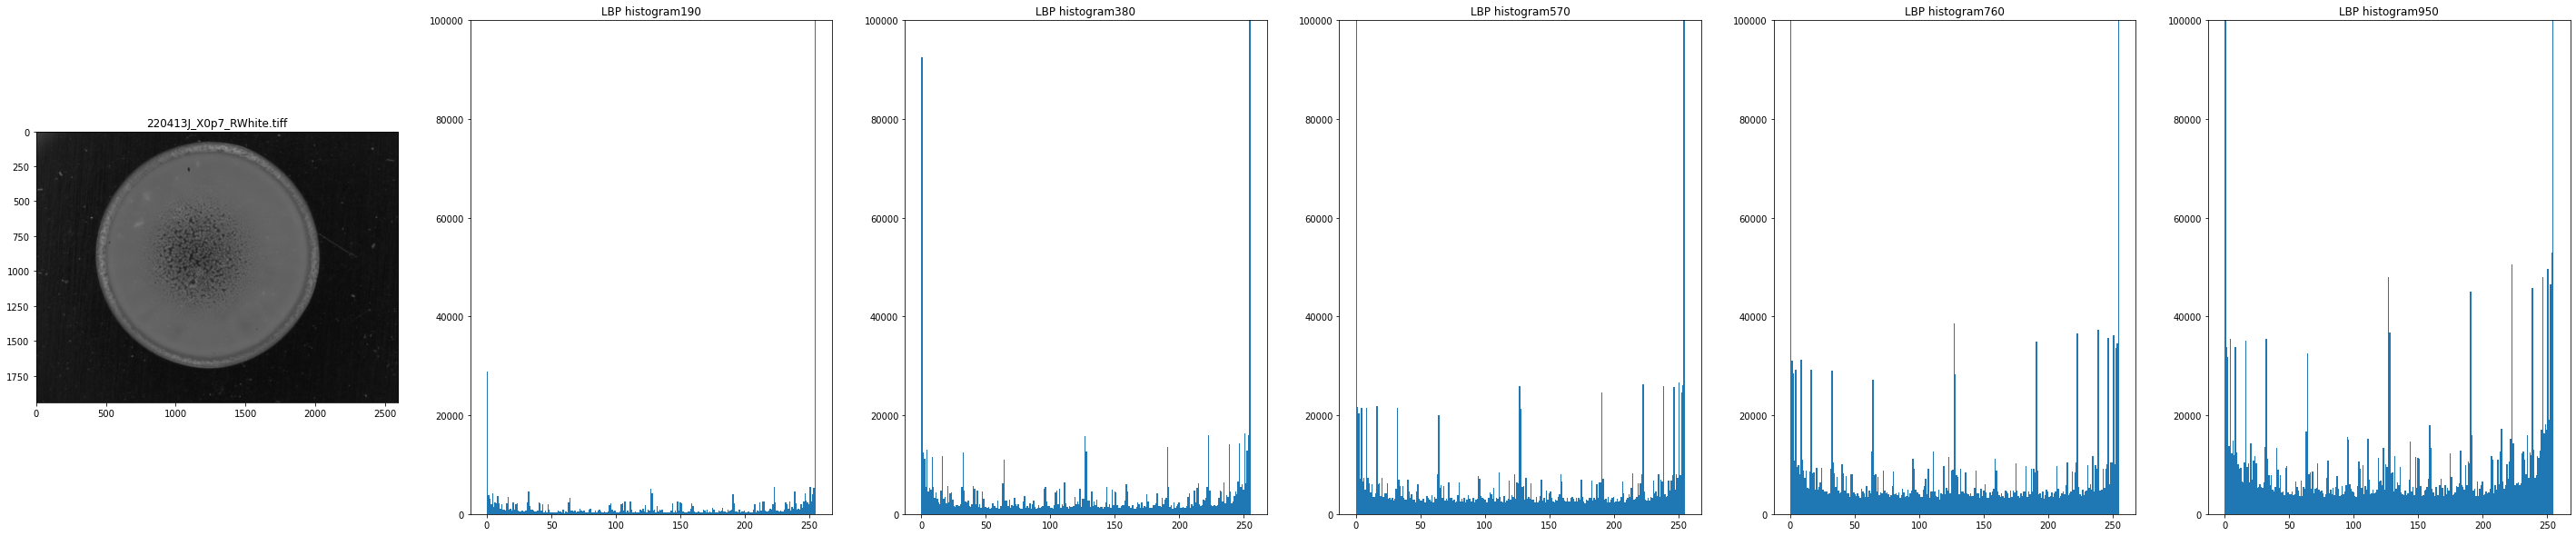

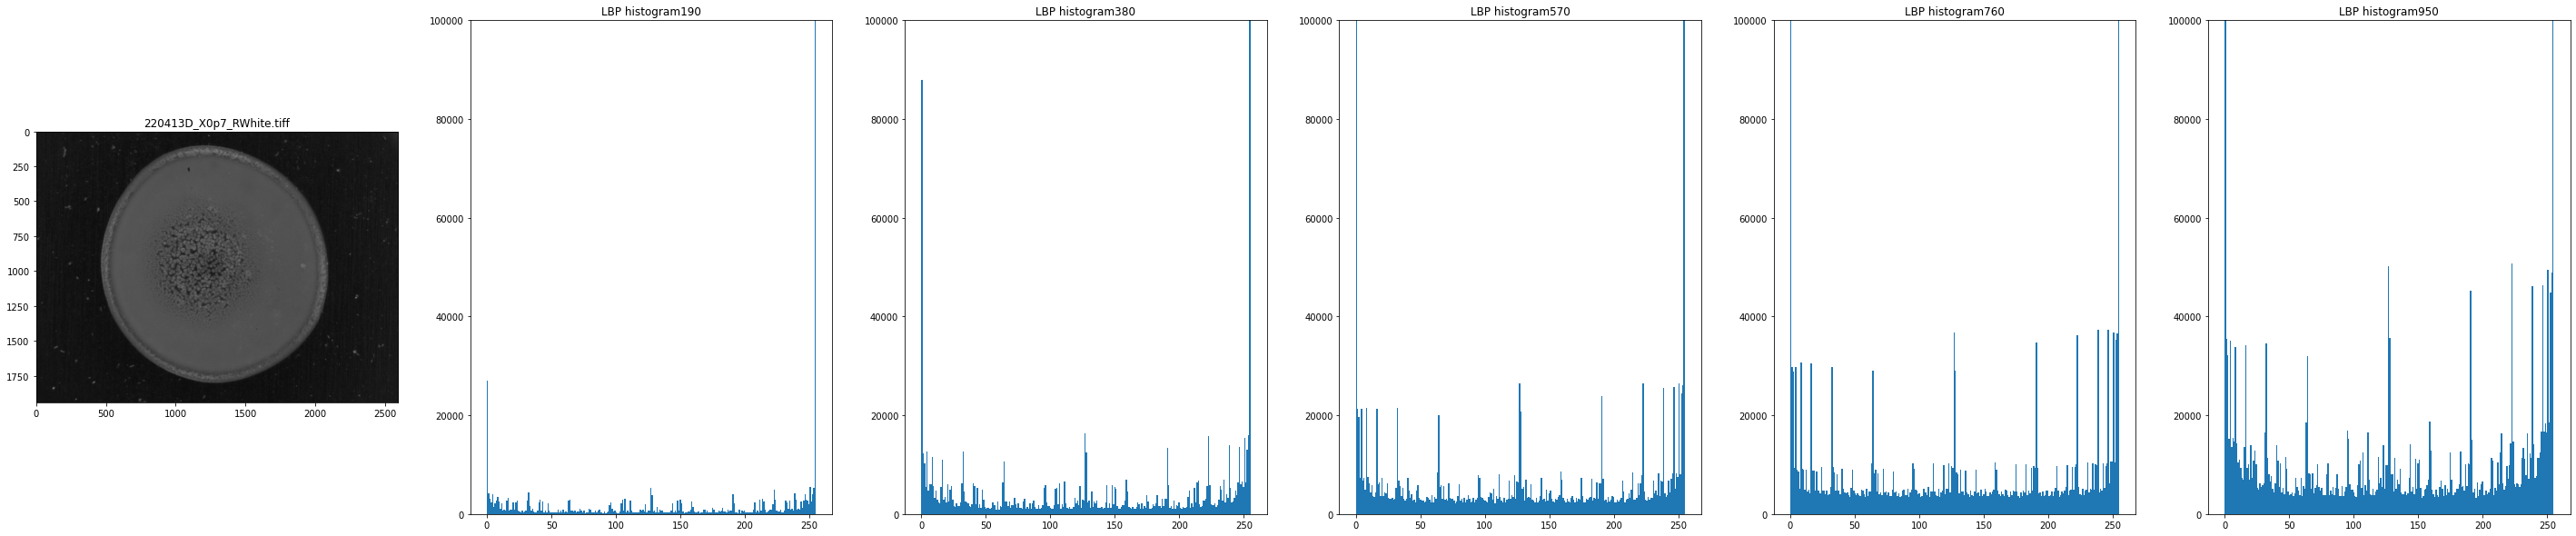

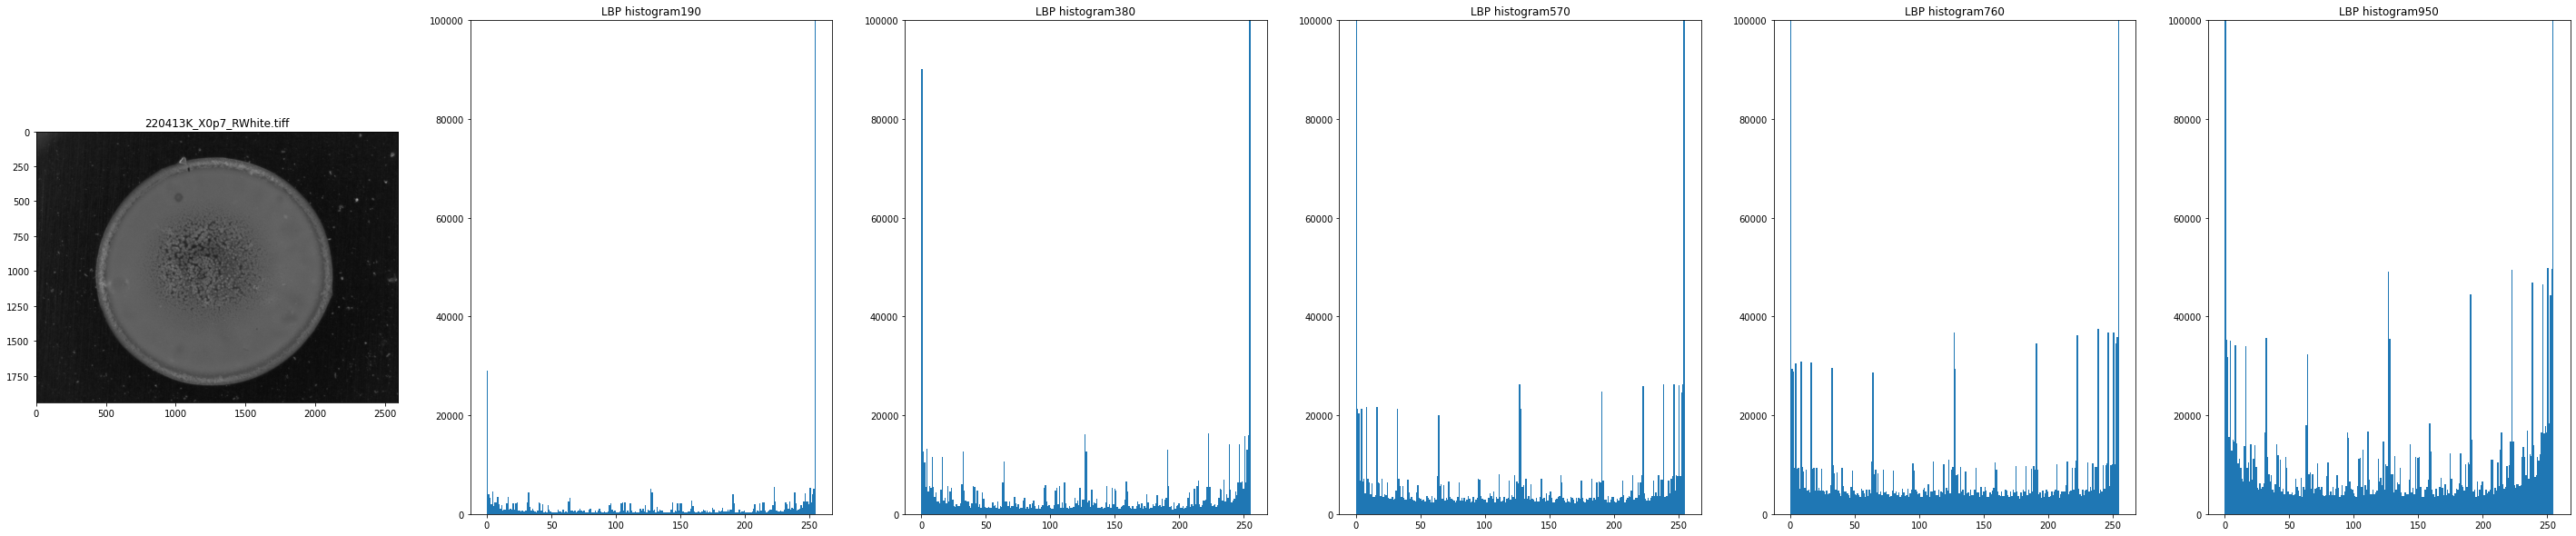

In [75]:
import os
from src.features.build_features import getLBPimage
import cv2

__file__ = os.path.abspath('')

project_dir = Path(__file__).resolve()


dark_blue = Path(str(project_dir) + '/../data/raw/220413/tiff/reflection/dark_blue').resolve()

main_lbp(dark_blue)

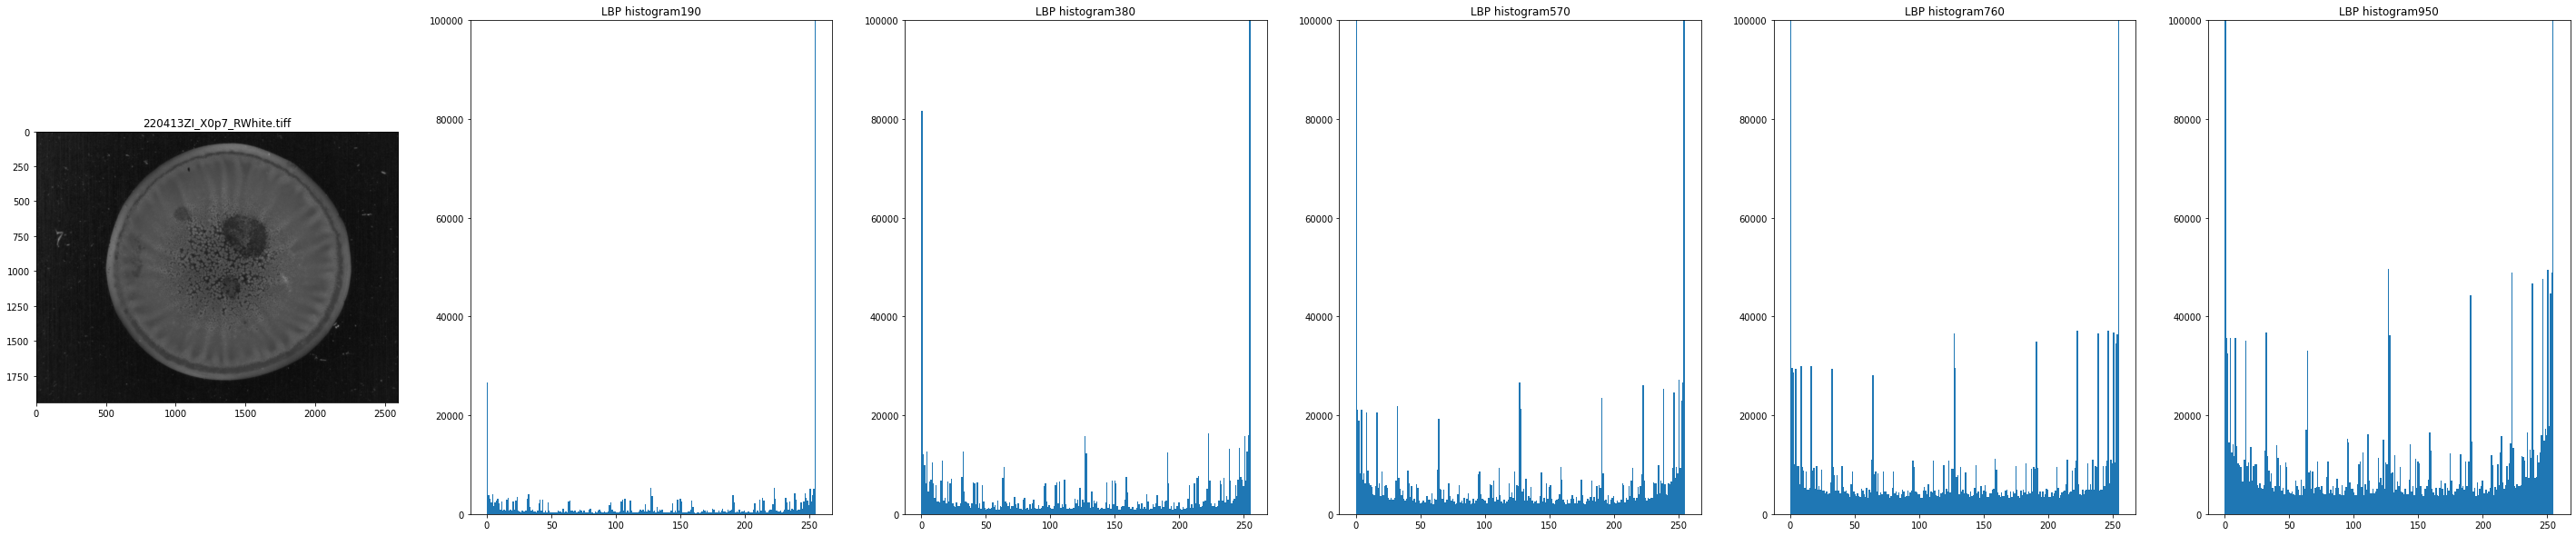

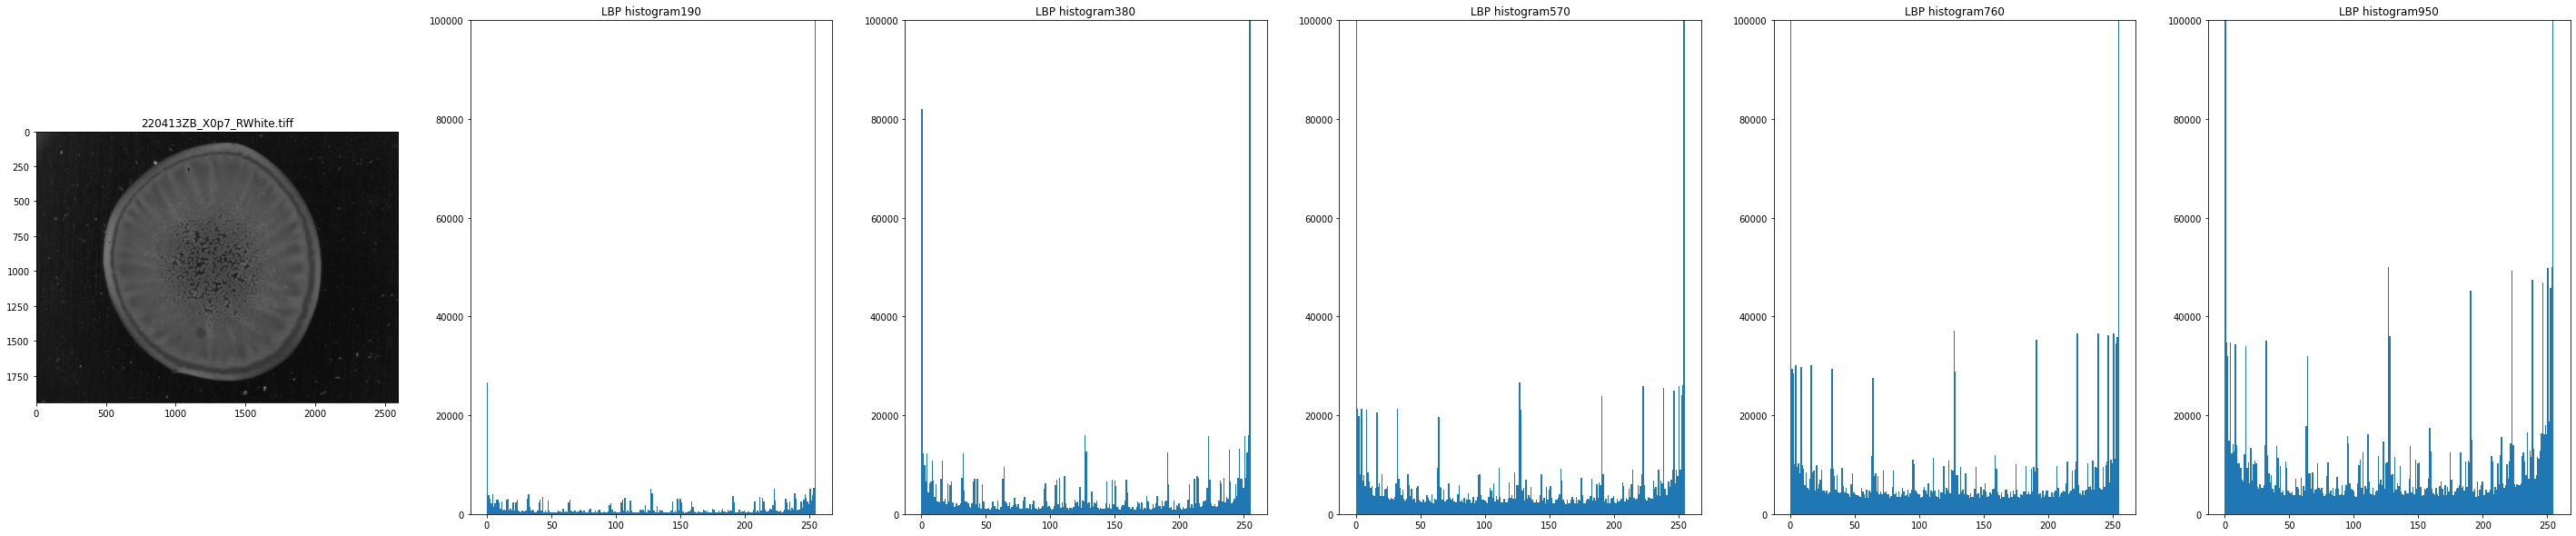

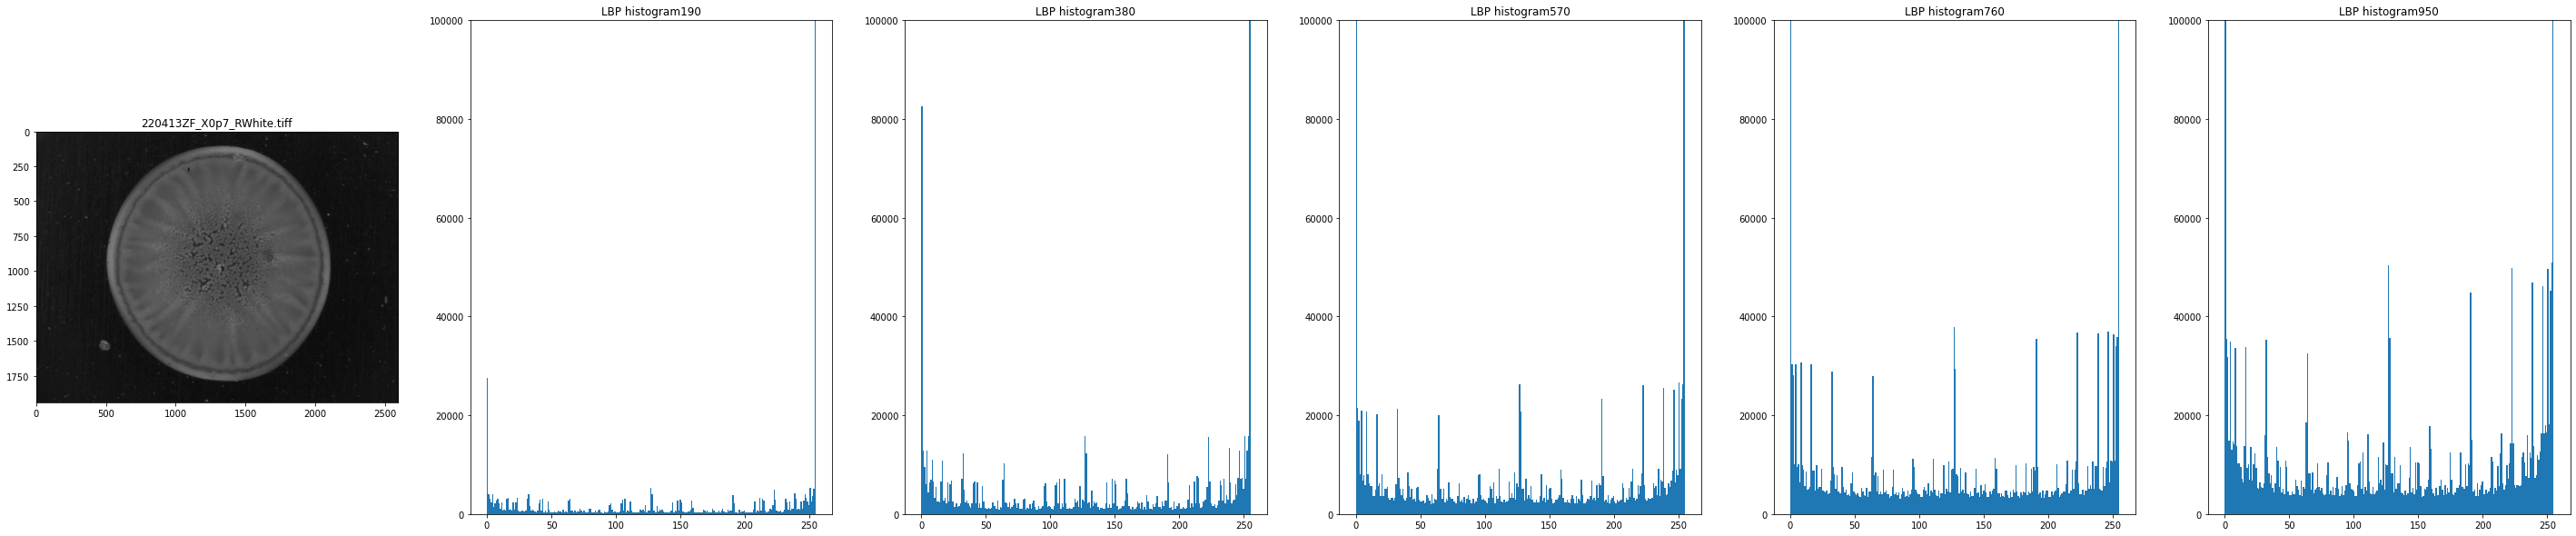

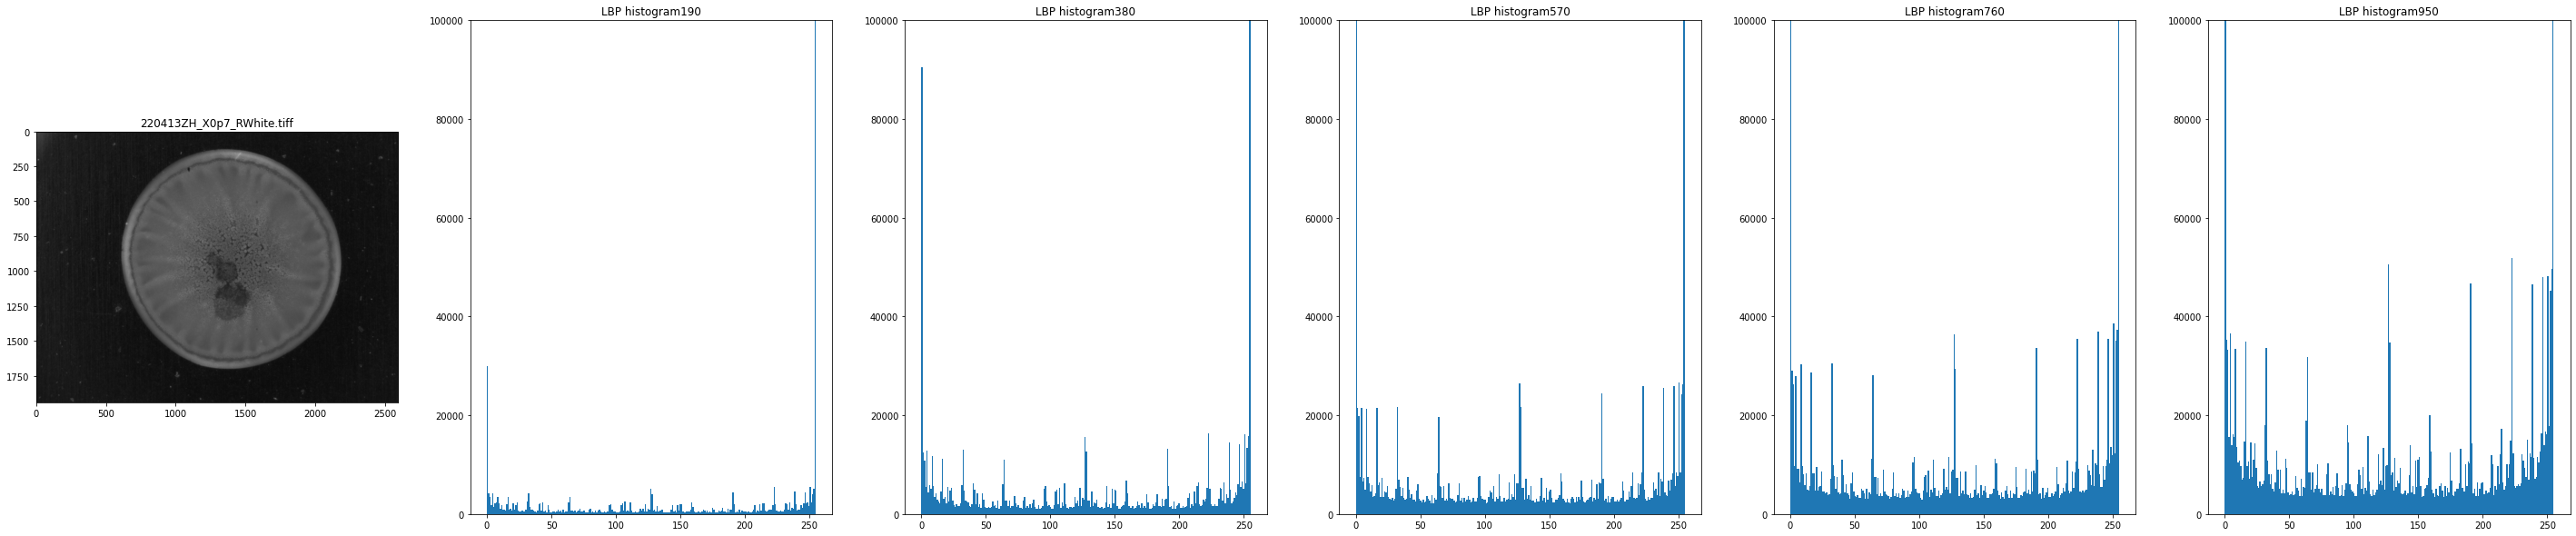

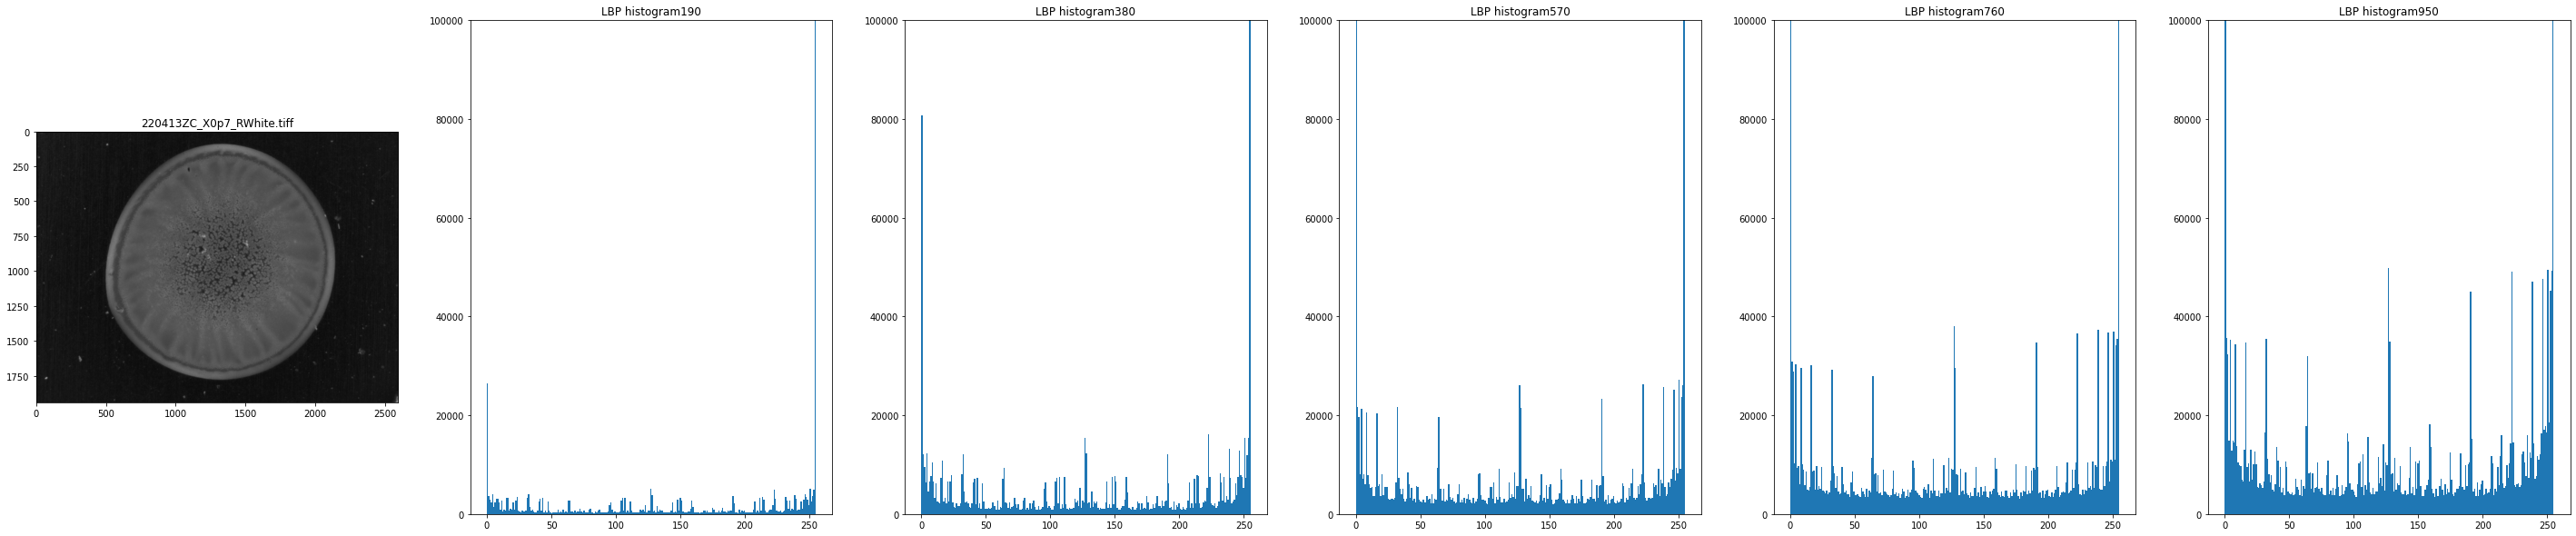

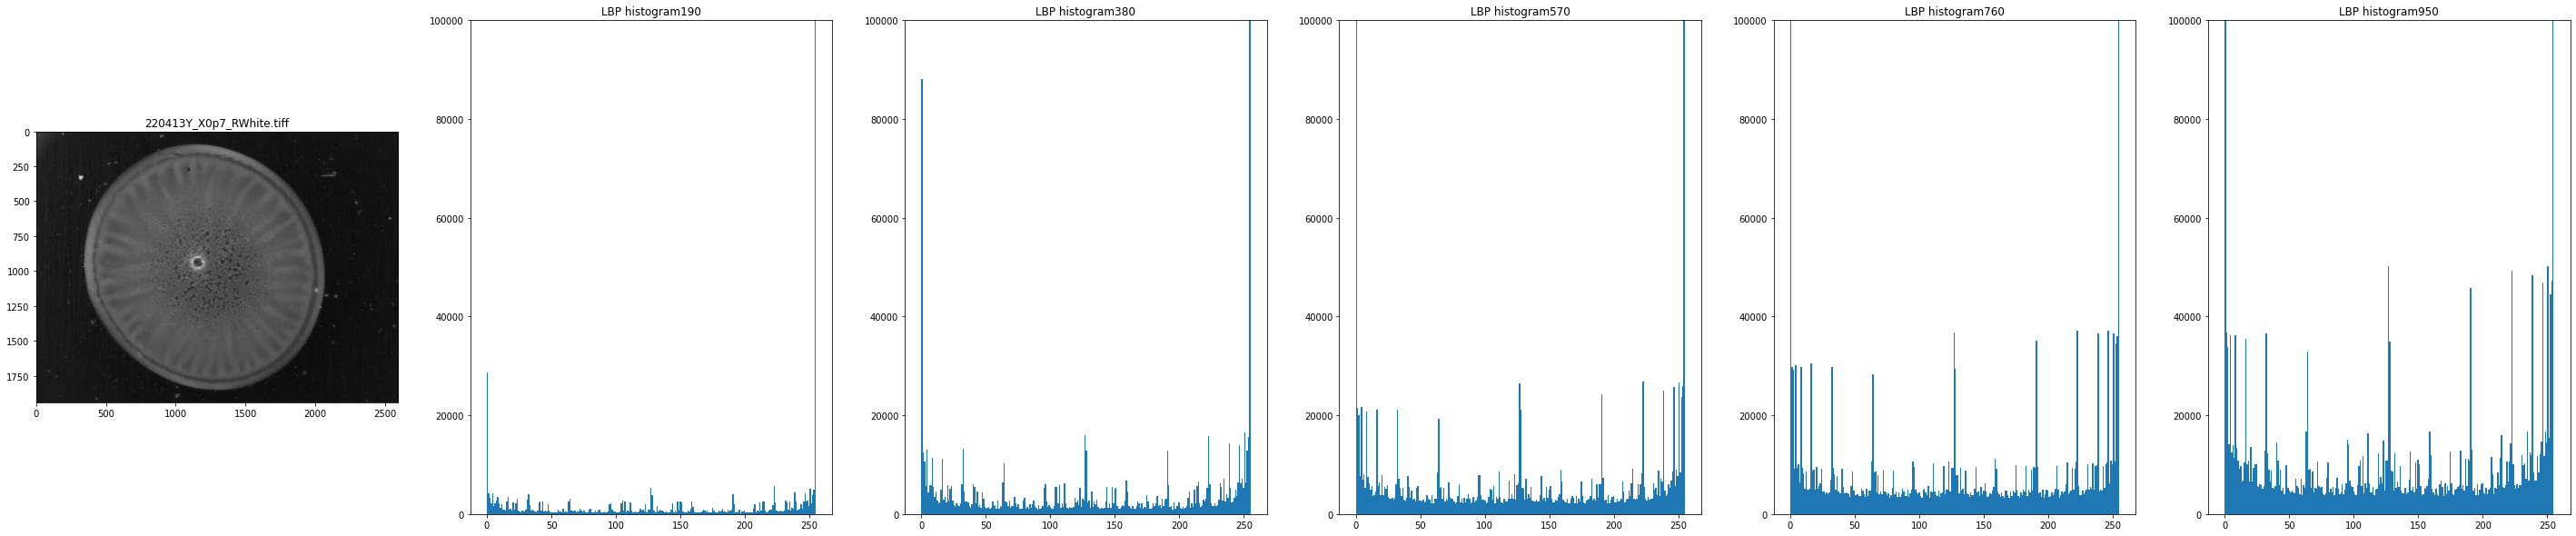

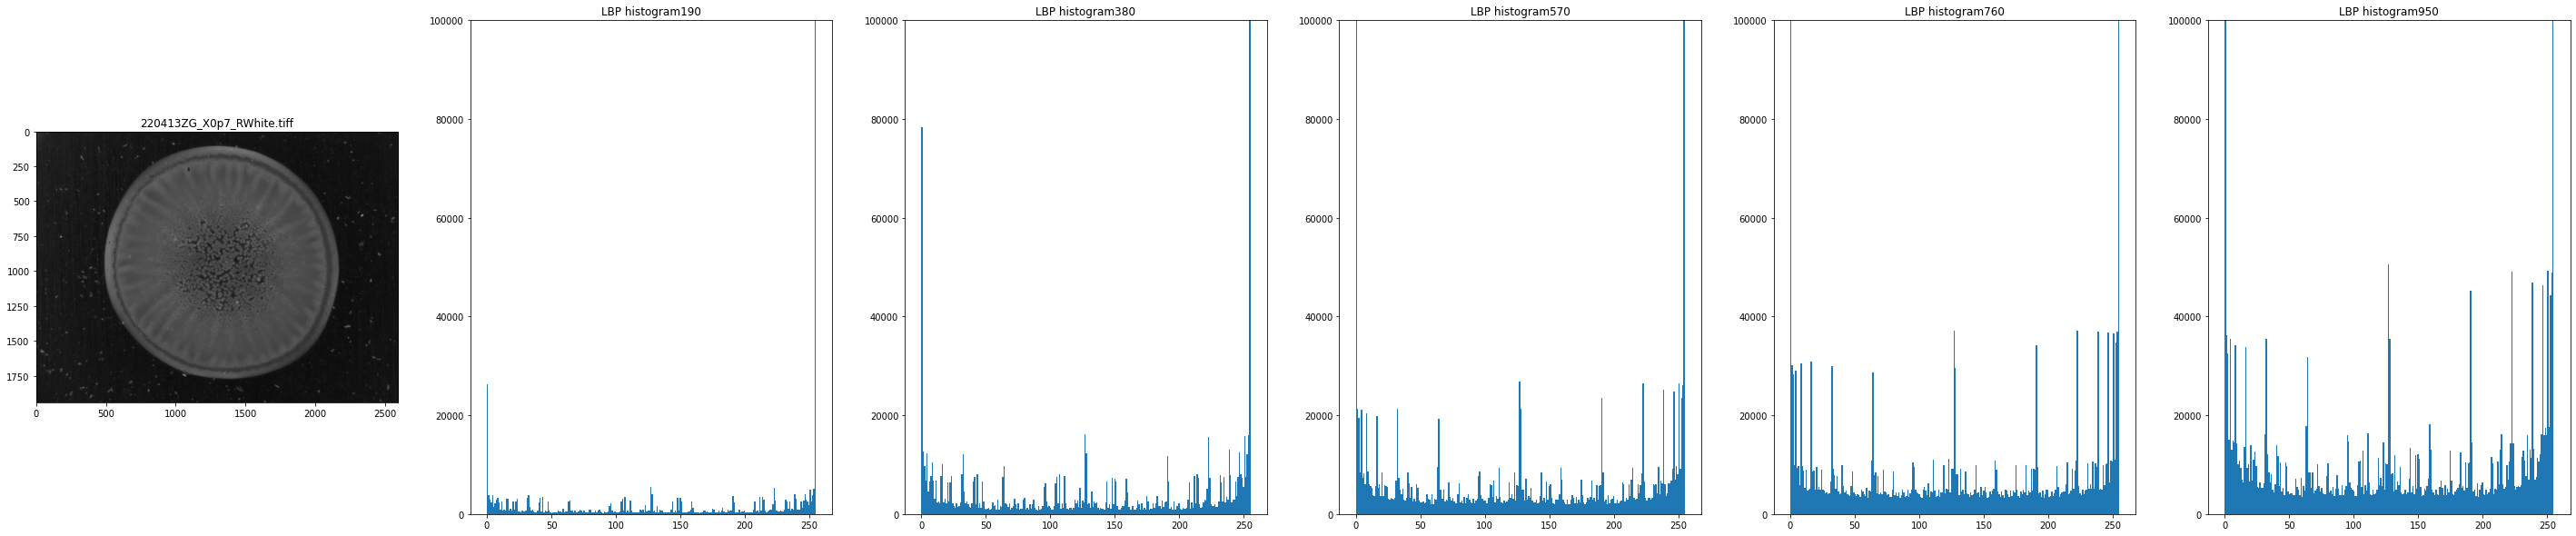

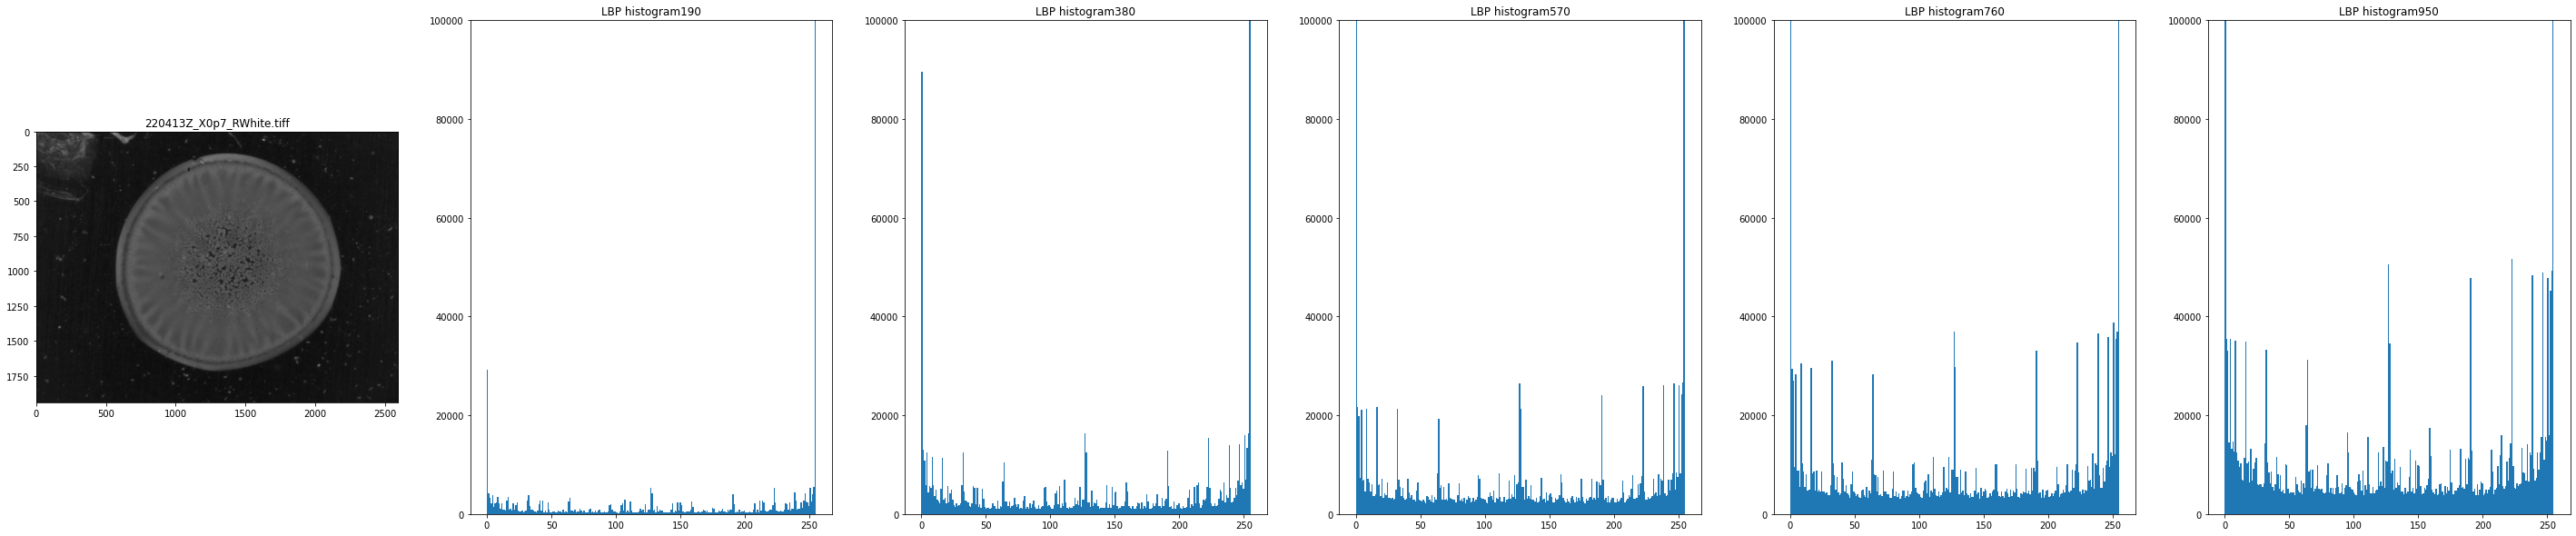

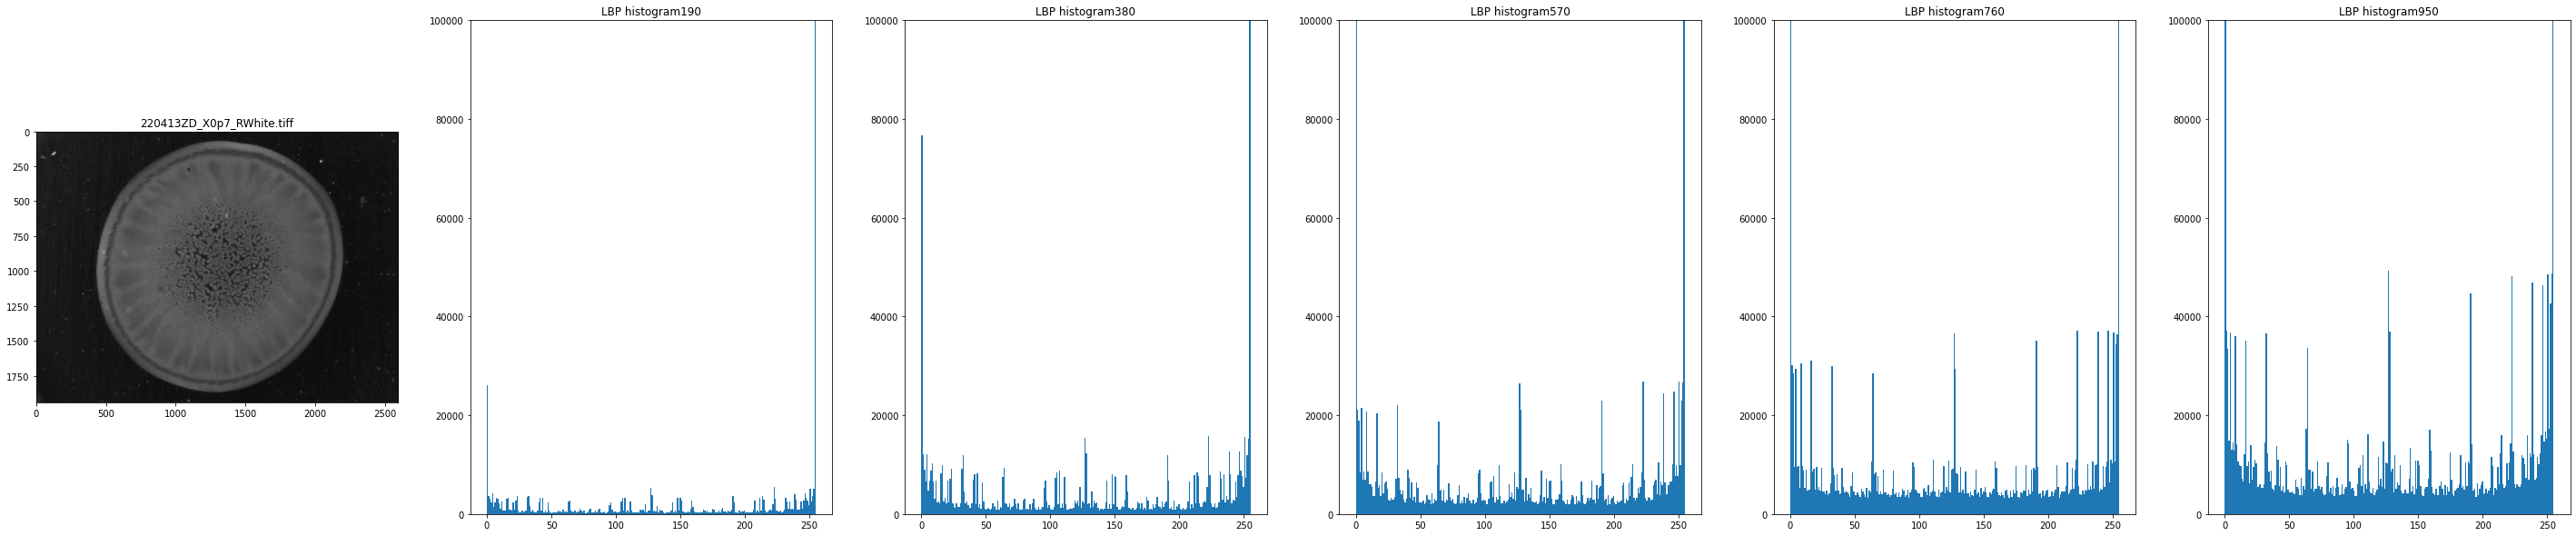

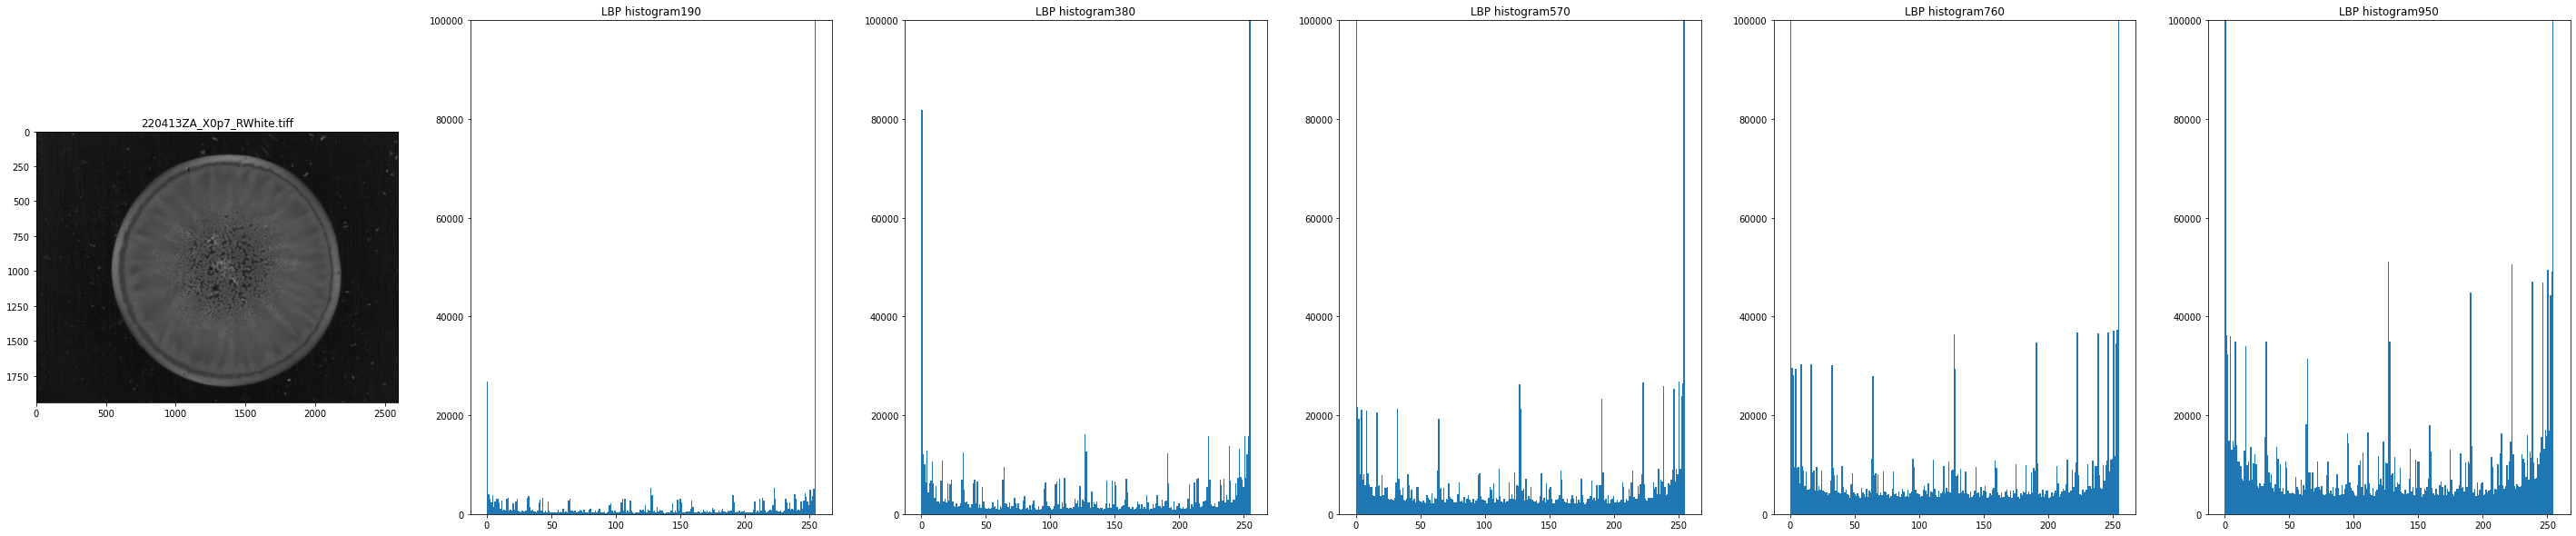

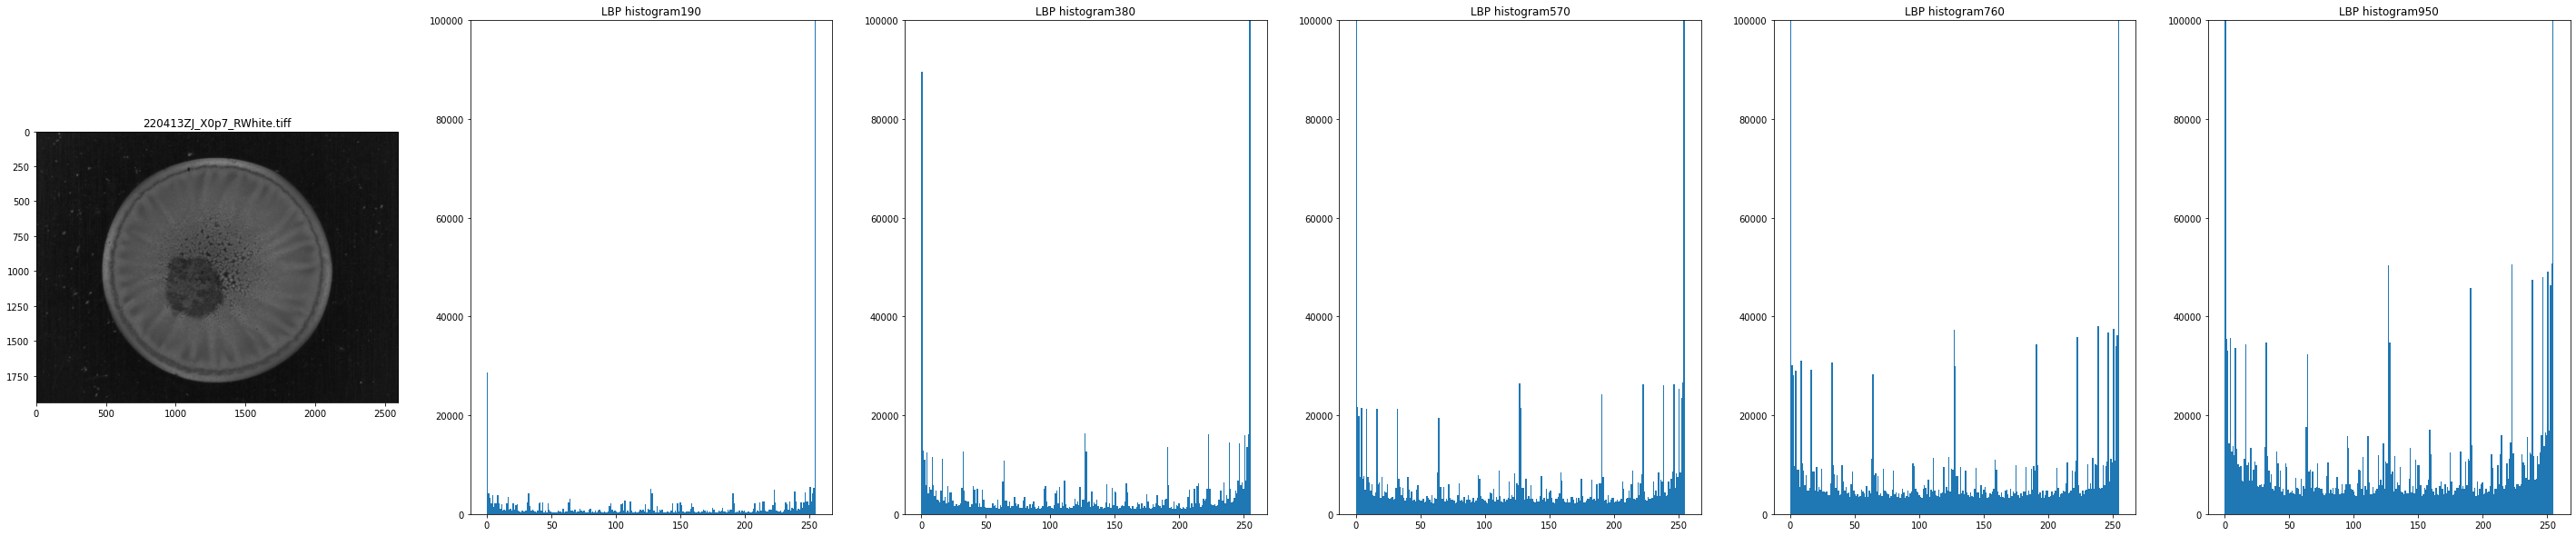

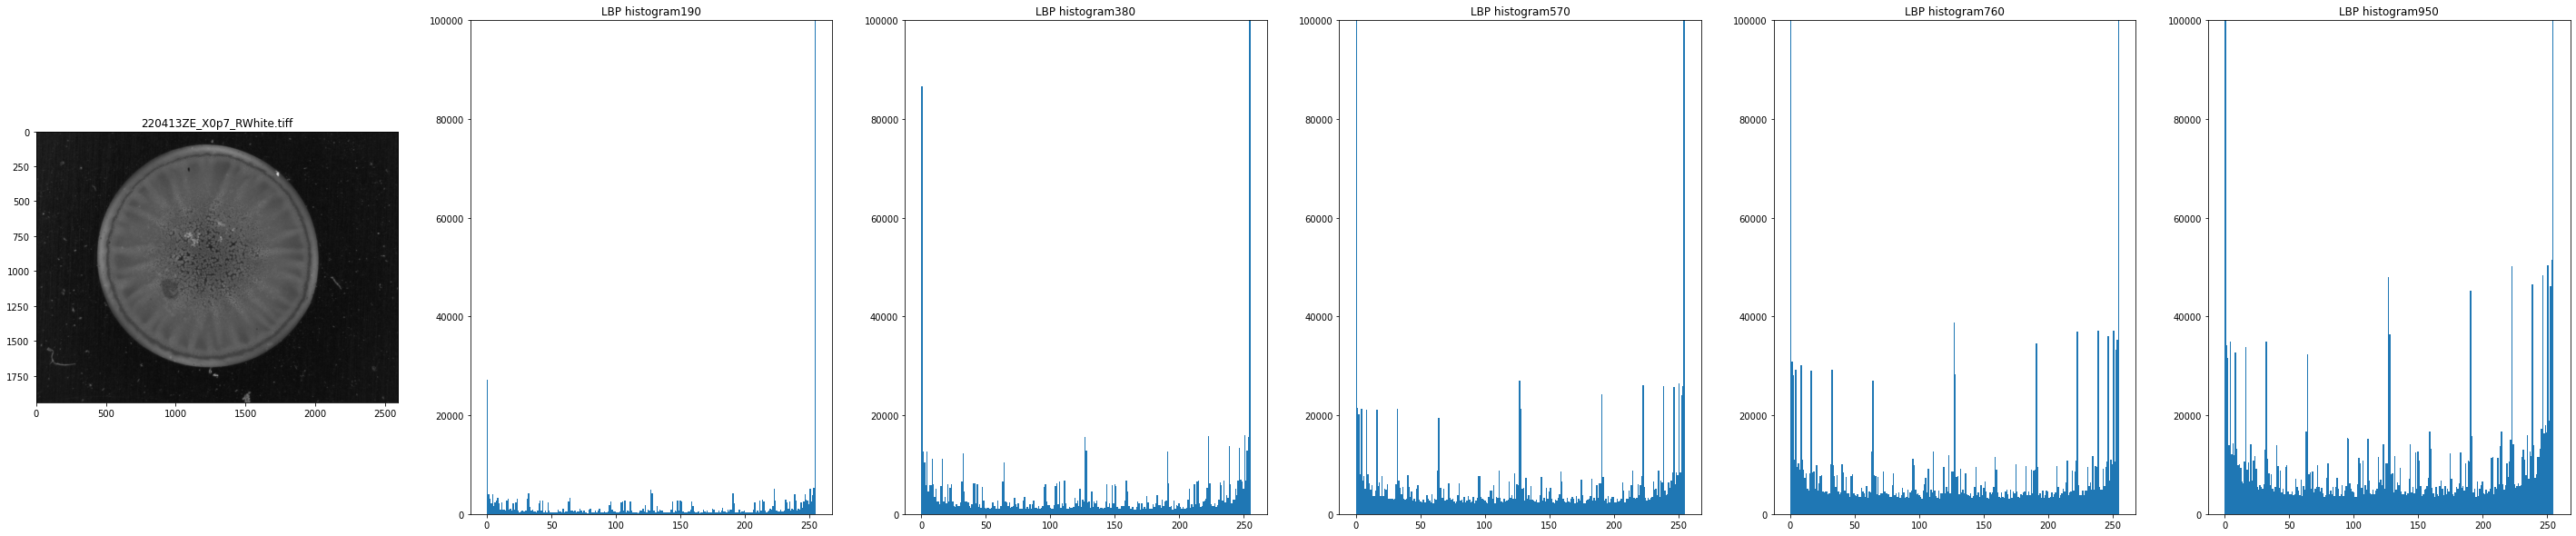

In [76]:
dbm_path = Path(str(project_dir) + '/../data/raw/220413/tiff/reflection/dbm_gm').resolve()

main_lbp(dbm_path)

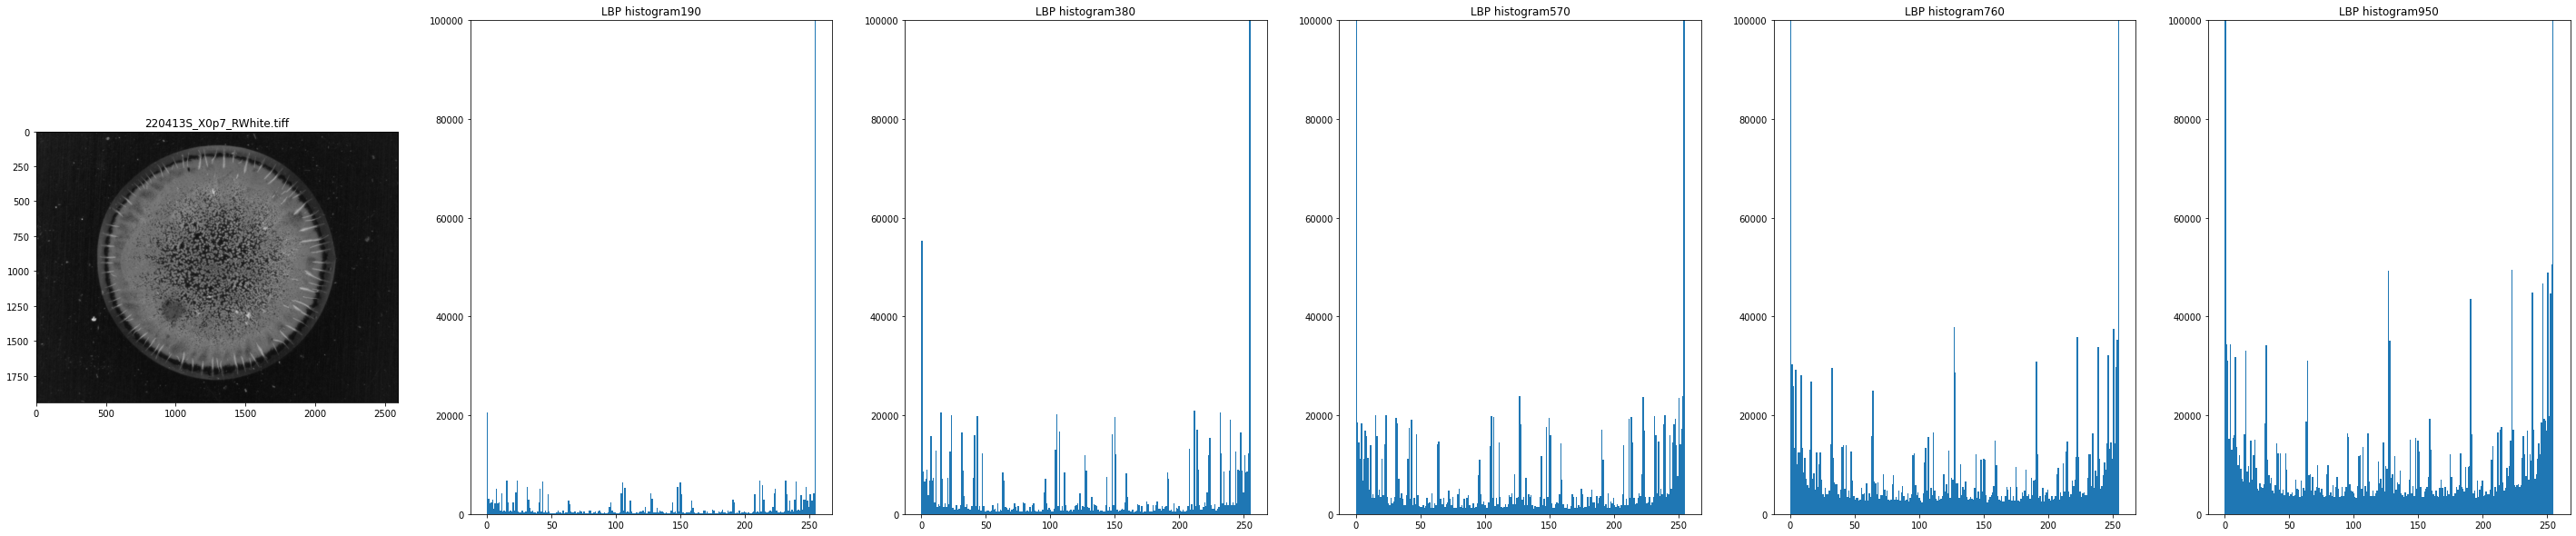

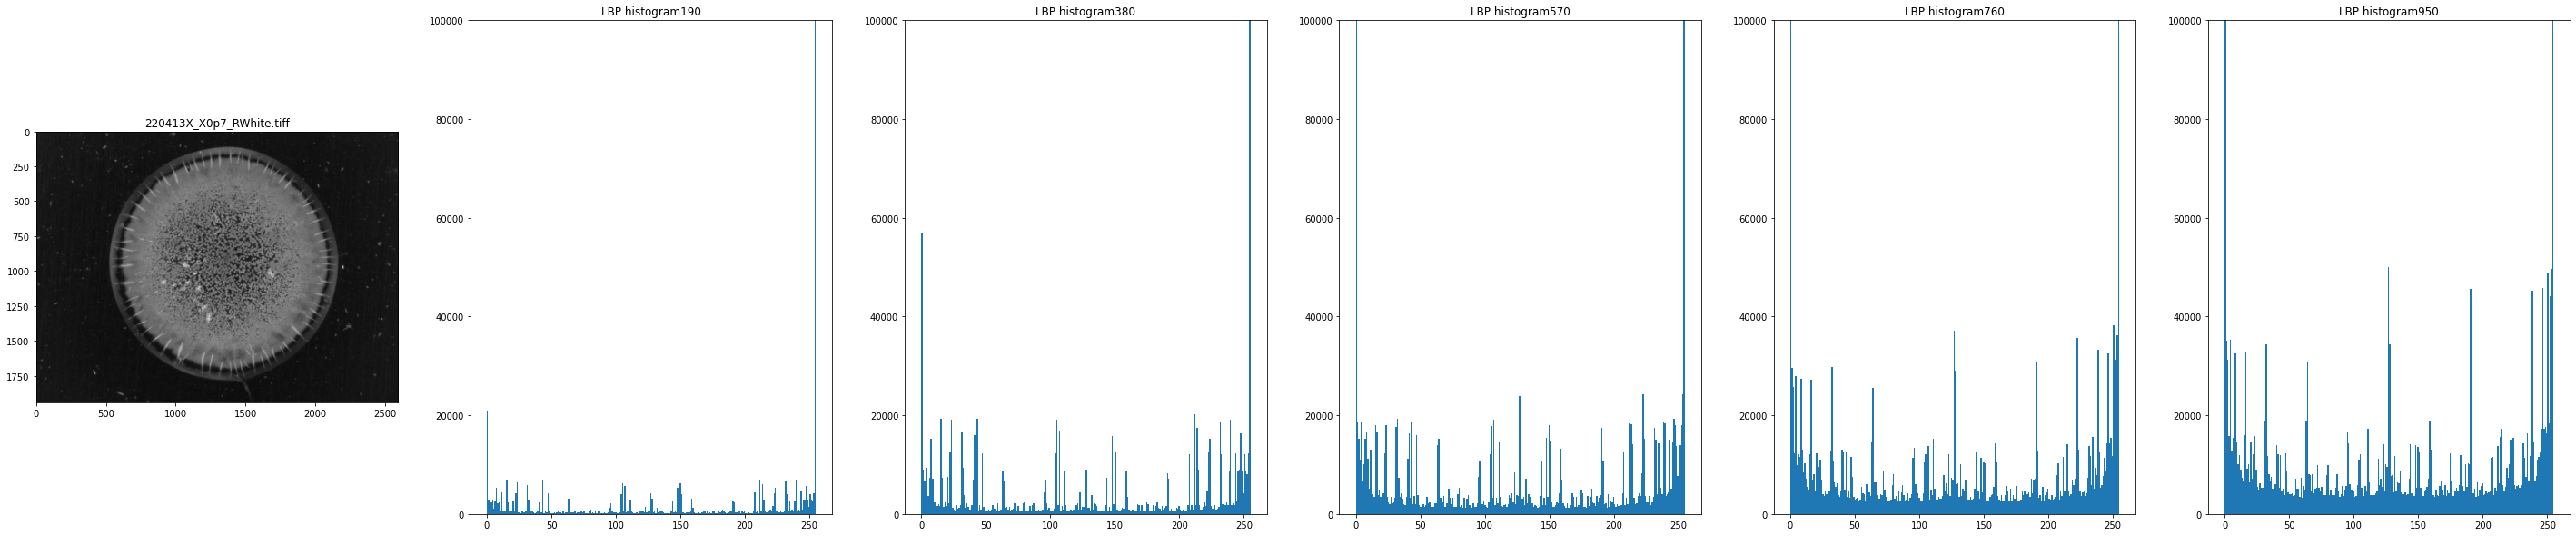

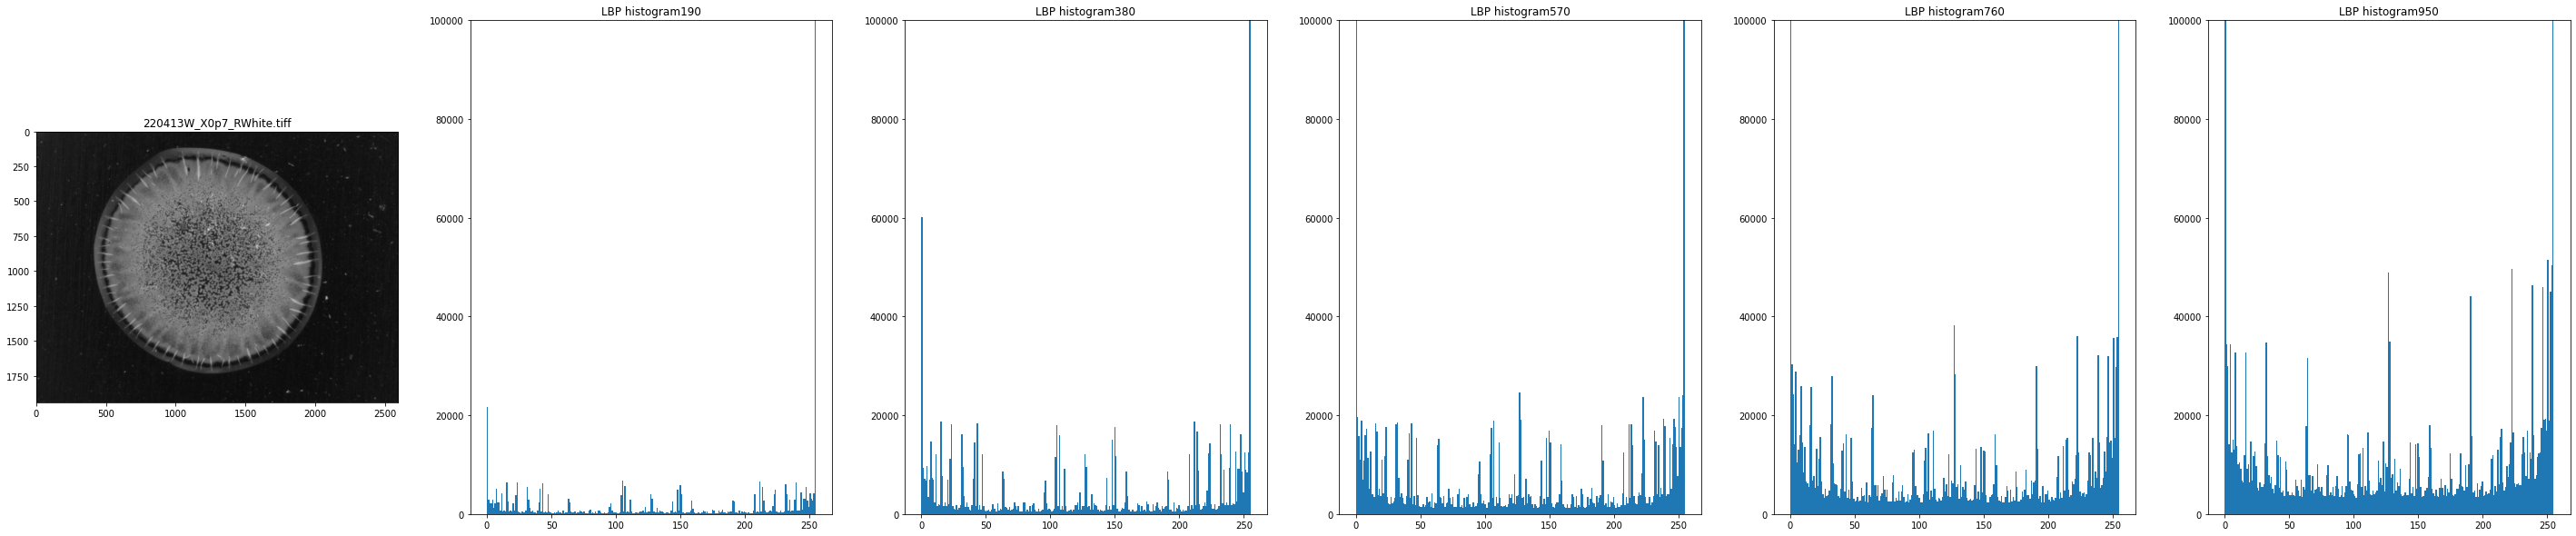

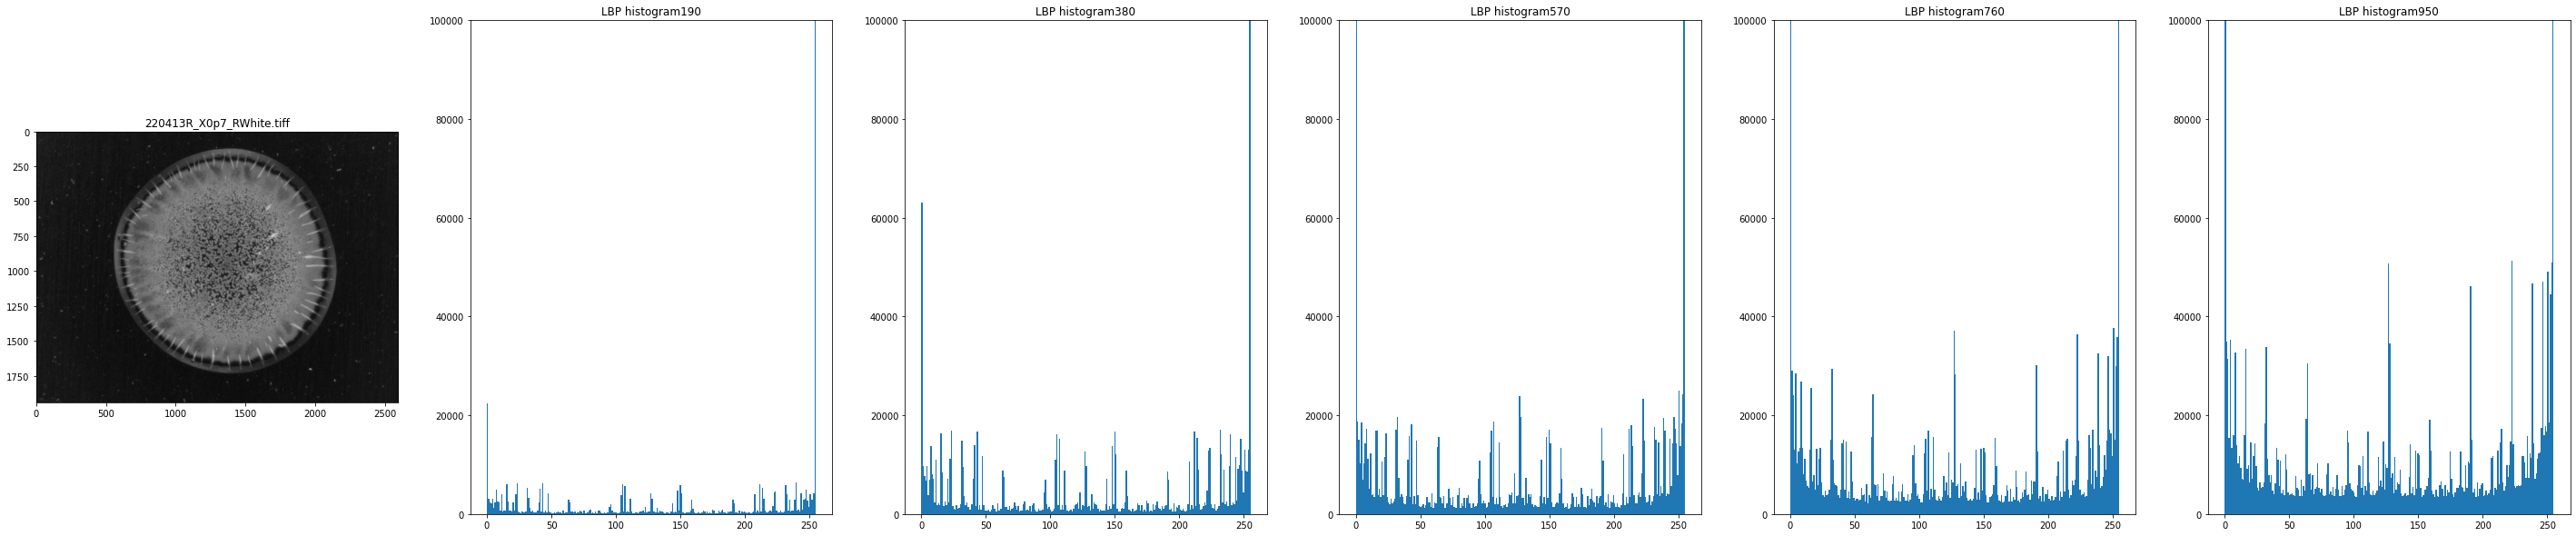

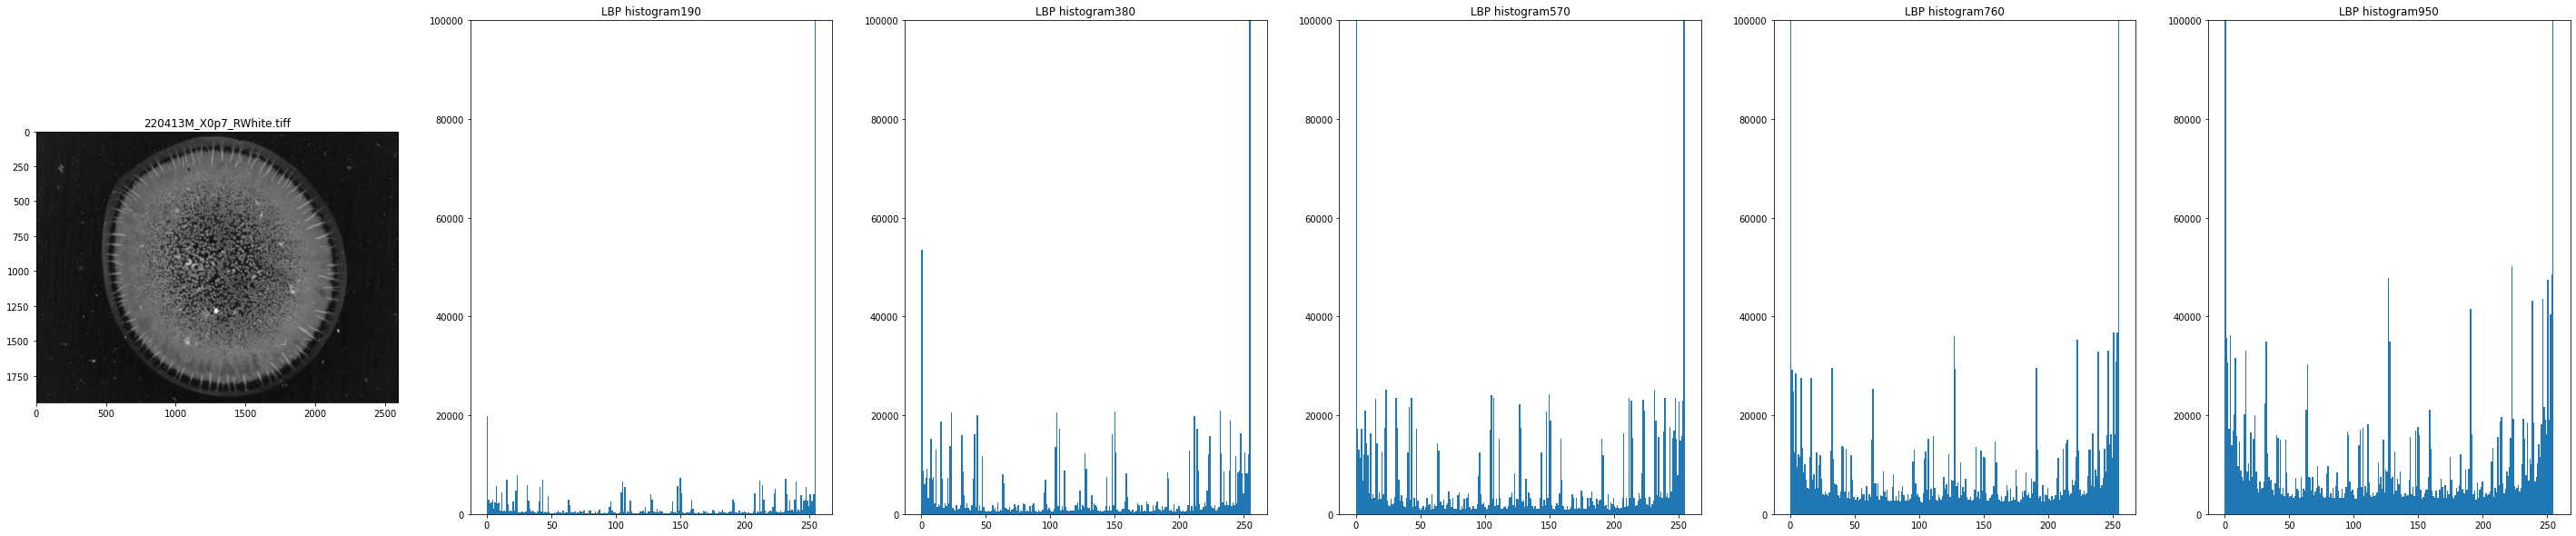

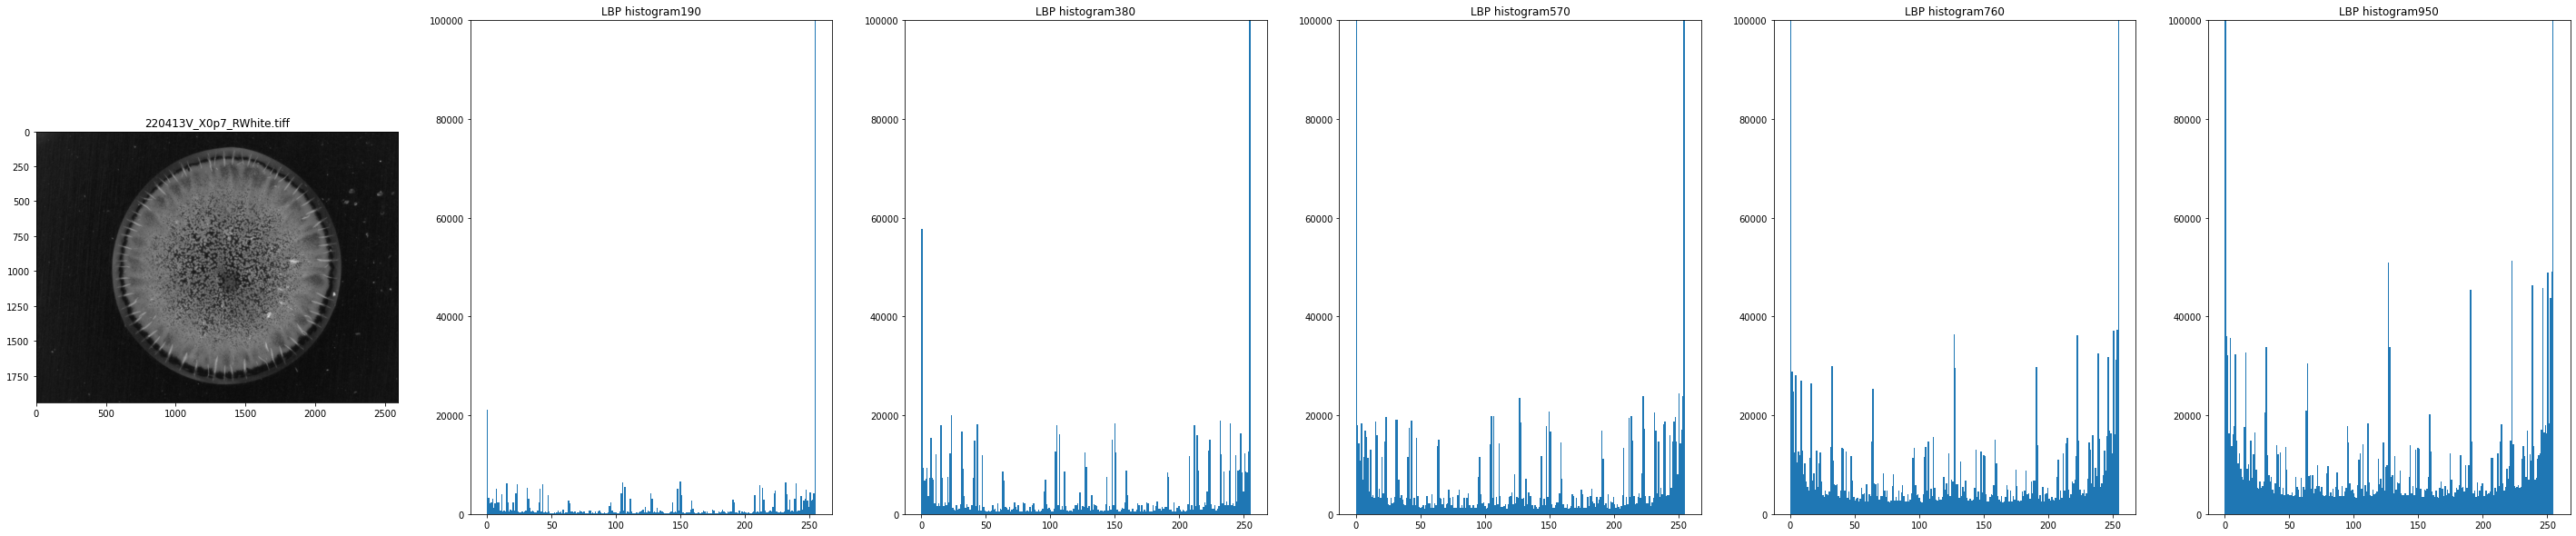

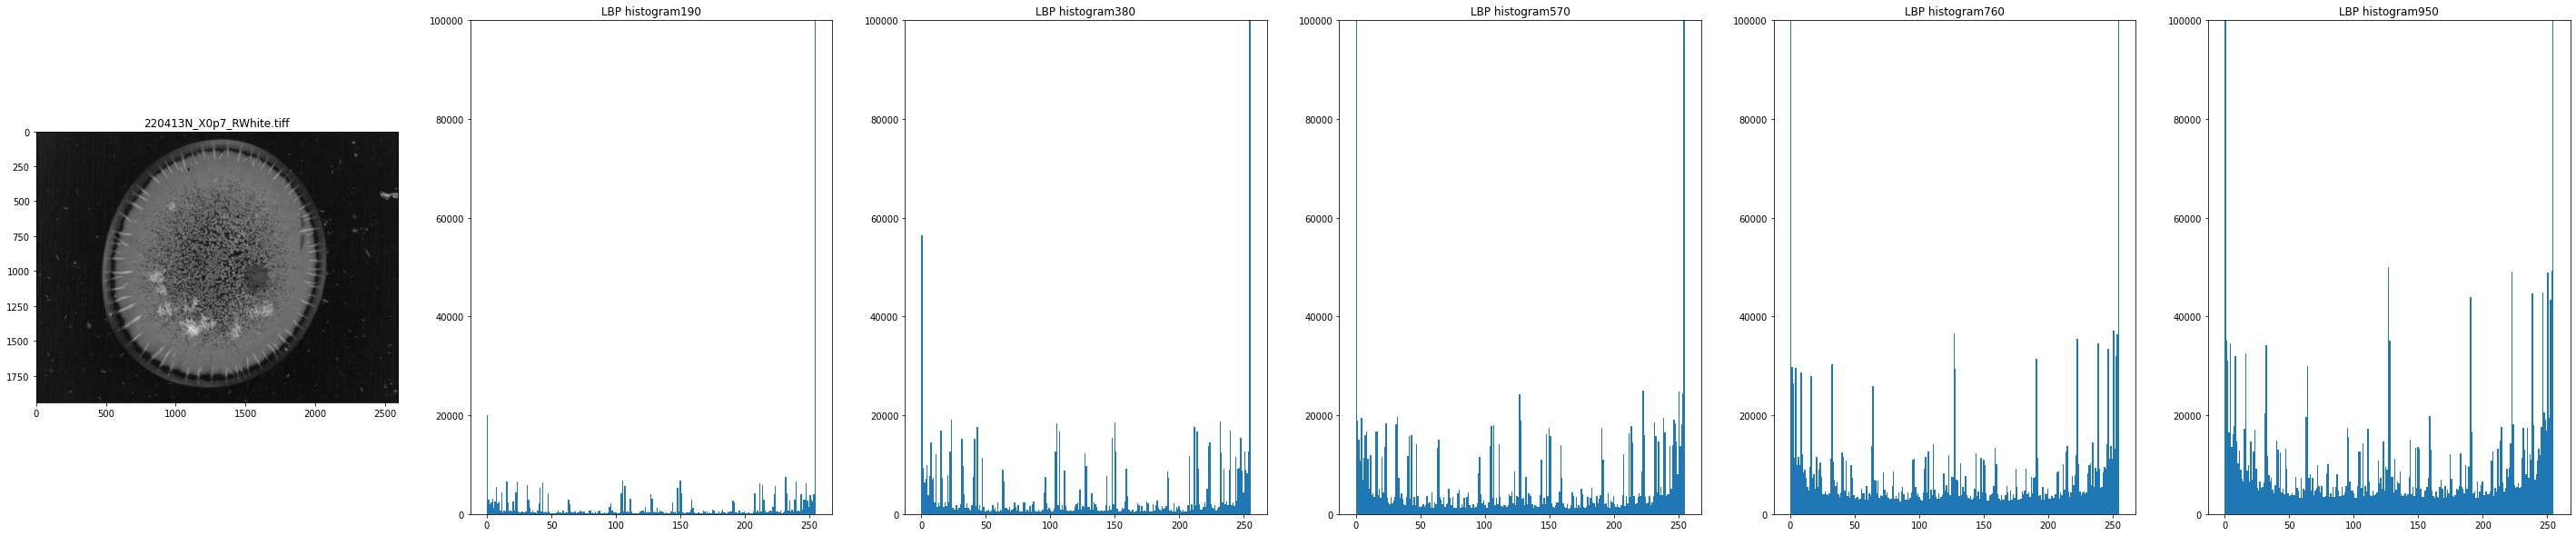

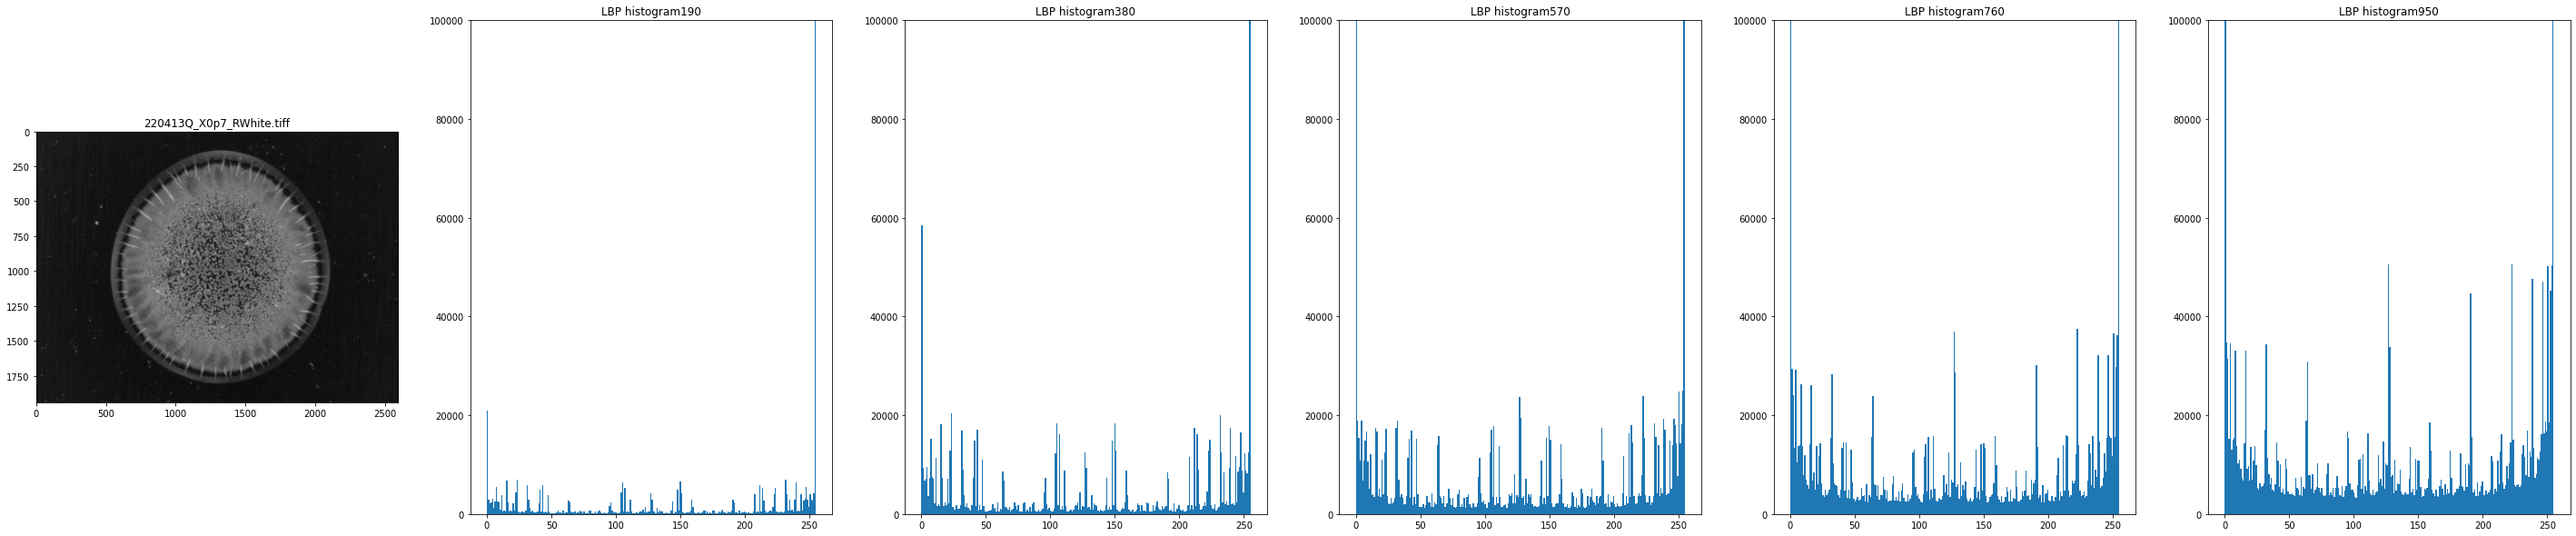

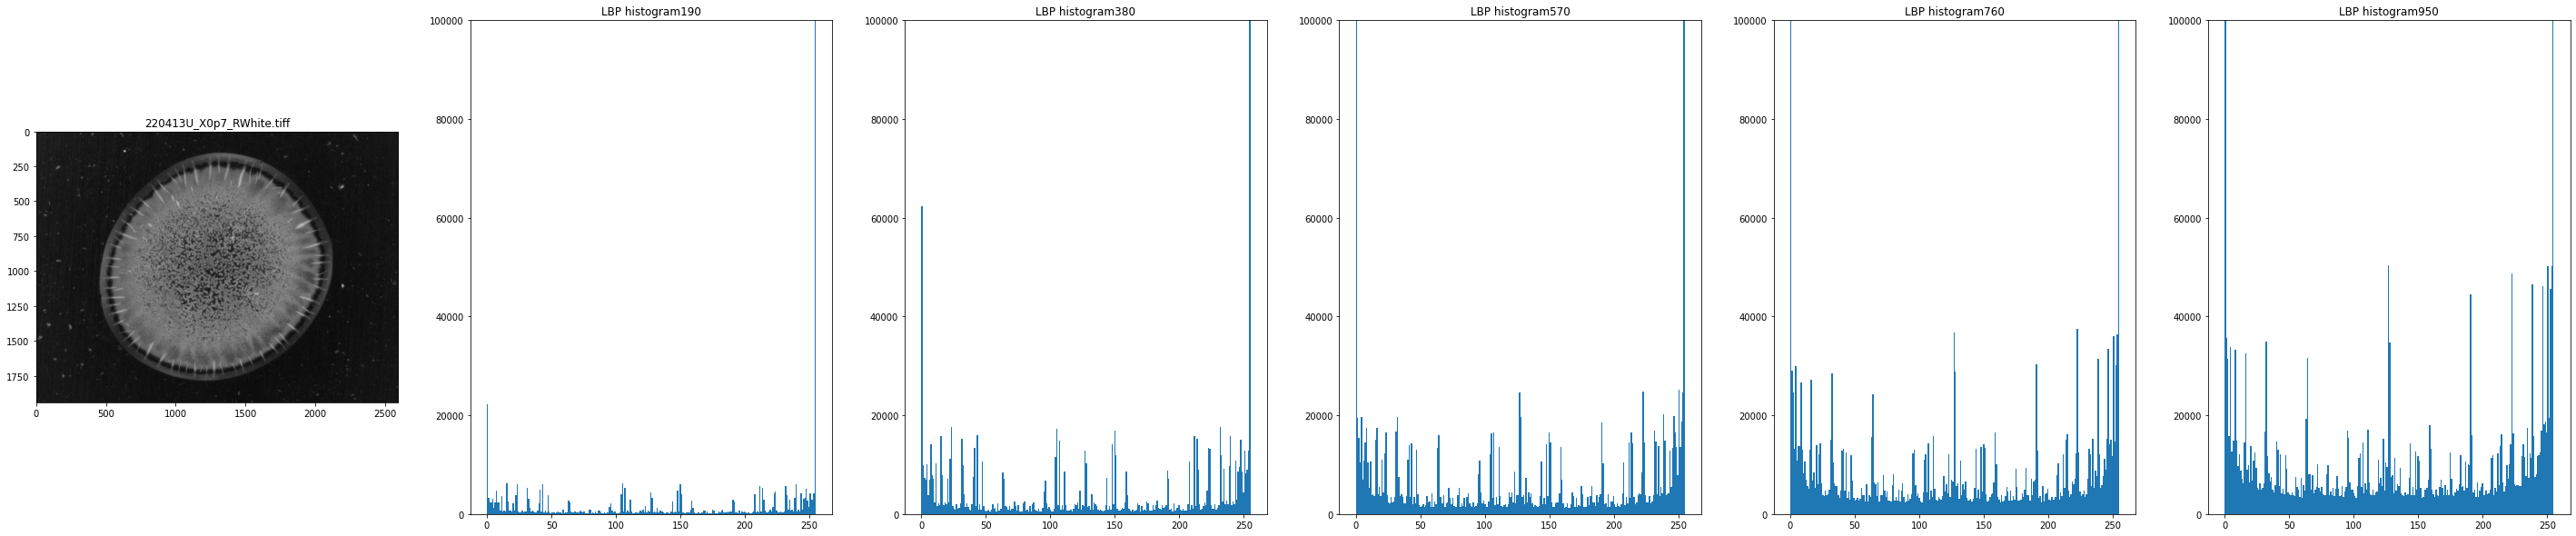

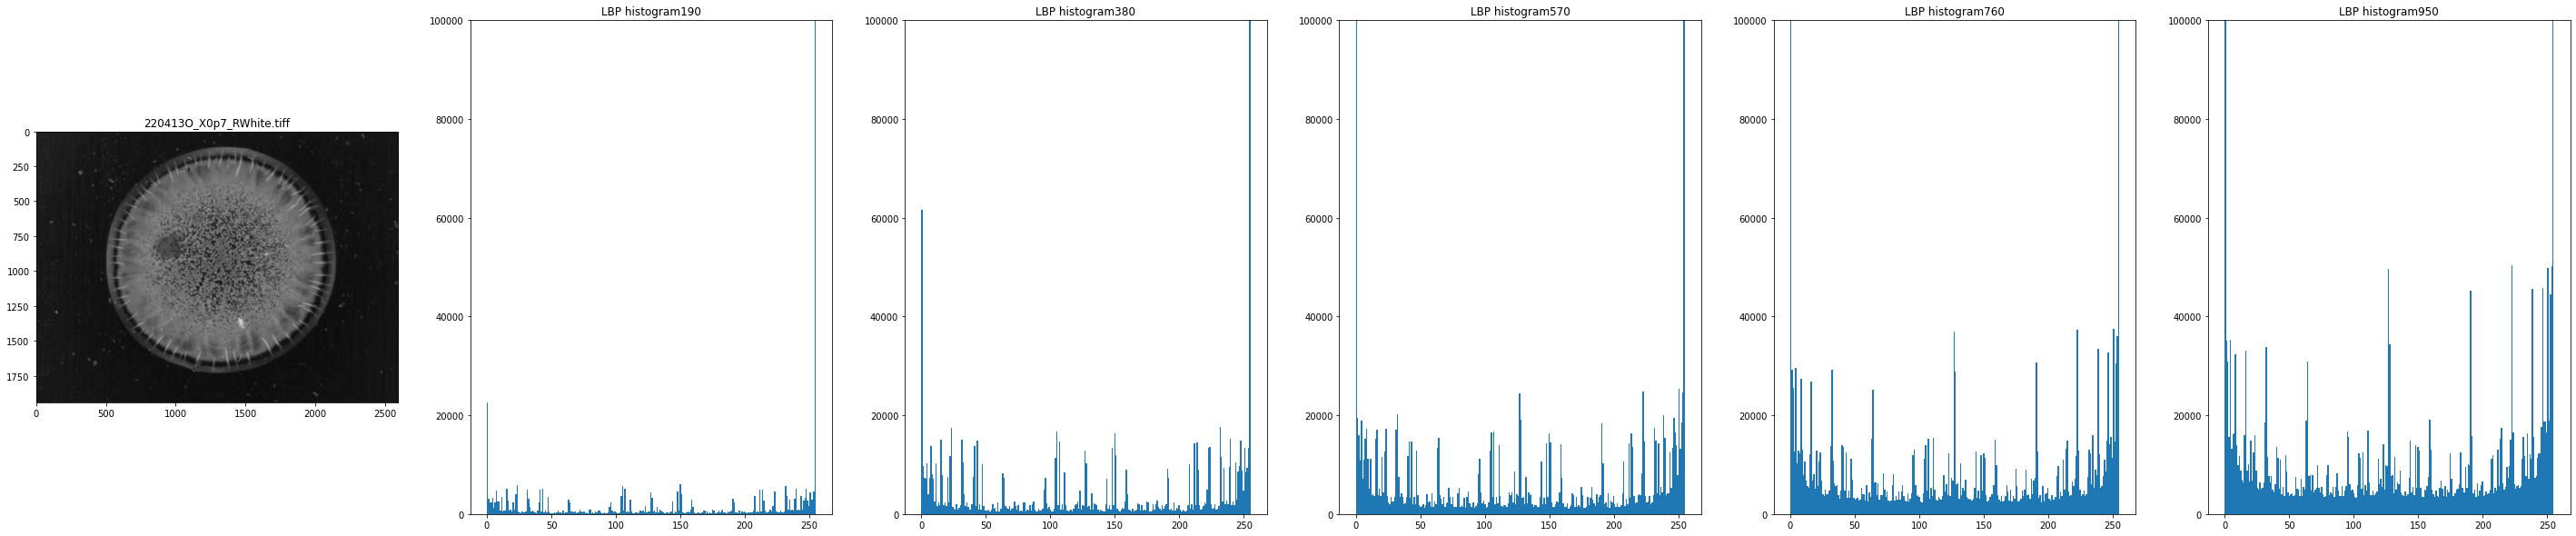

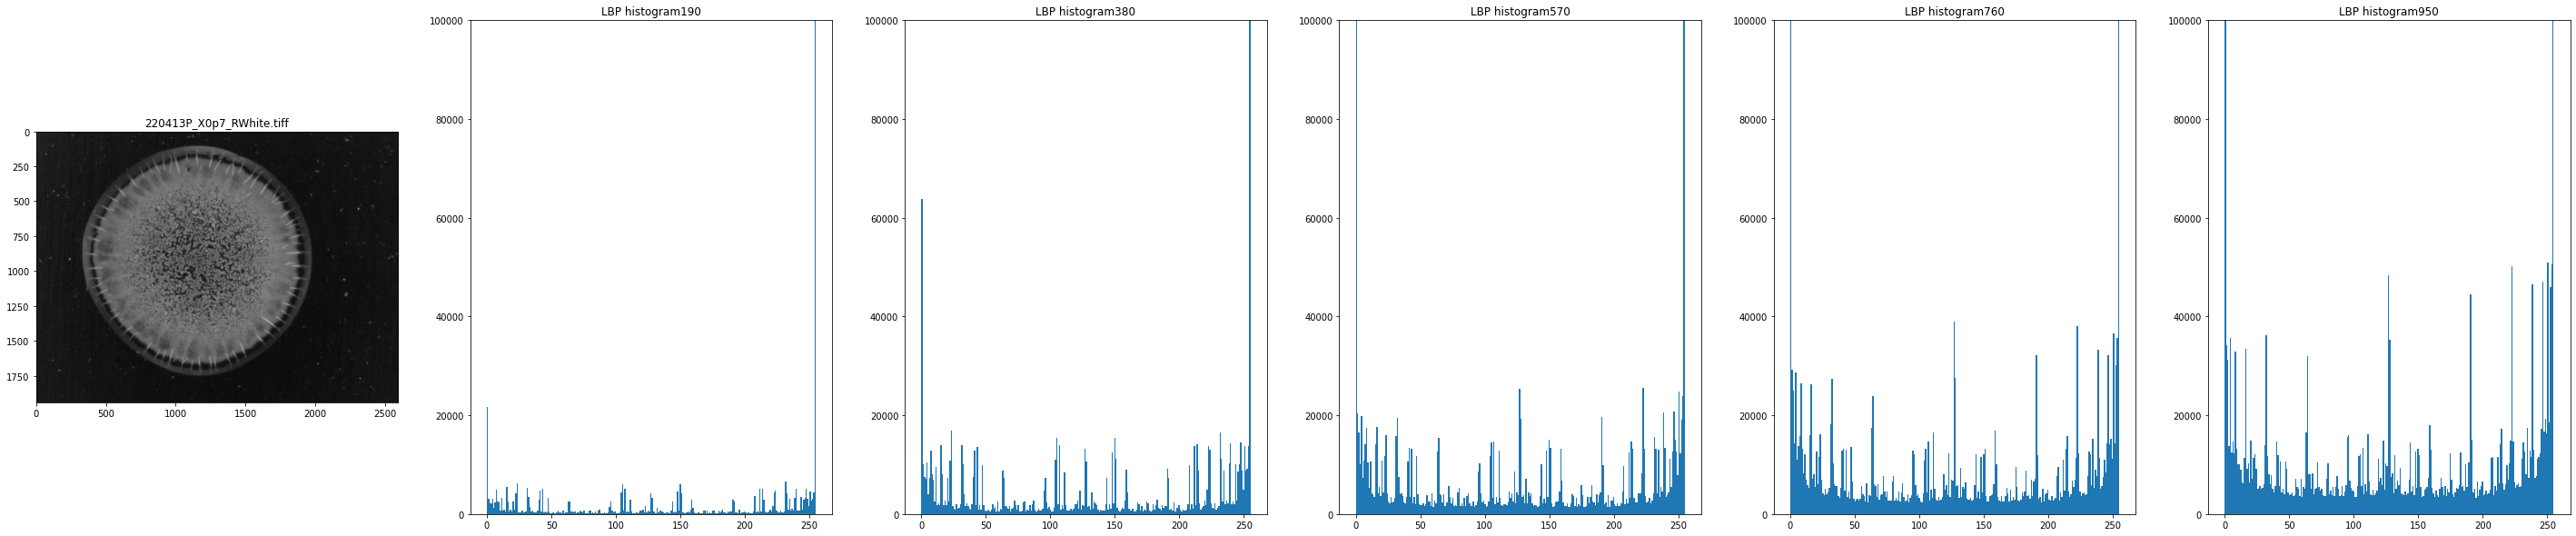

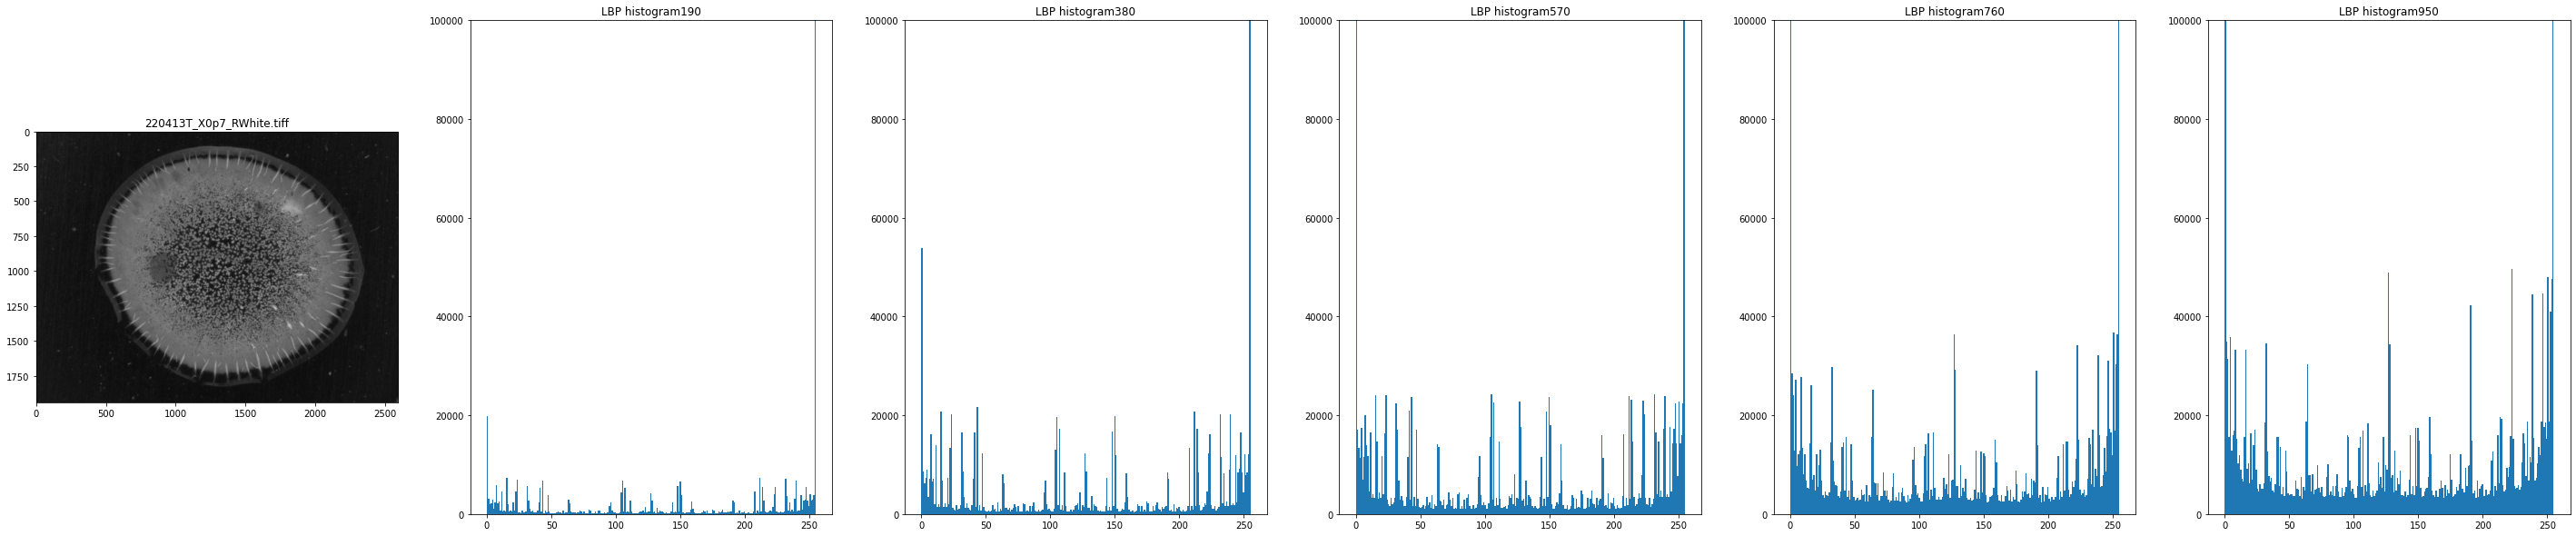

In [77]:
green_trim = Path(str(project_dir) + '/../data/raw/220413/tiff/reflection/green_trim').resolve()

main_lbp(green_trim)